In [1]:
from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Script to replicate results presented in "Treating Safe and Sustainable-by-Design as a Multi-objective Optimization Problem – Decision Spaces of Polyethylene Terephthalate versus Polylactic Acid" 
Akshat Sudheshwar, Empa – Swiss Federal Laboratories for Material Science and Technology, Technology and Society Laboratory, Lerchenfeldstrasse 5, 9014 St. Gallen, Switzerland

## 1. Introduction
This Jupyter notebook includes the script used for the analysis presented in the article **"Treating Safe and Sustainable-by-Design as a Multi-objective Optimization Problem – Decision Spaces of Polyethylene Terephthalate versus Polylactic Acid"**. It performs the folloing tasks:
1. Script begins by importing the relevant CSV files, which contain sustainability impact scores associated with the lifecycle stages of various plastics (PLA, nbdPLA, PET, rPET).
2. These files are then cleaned and modified
3. Subsequently files are used to construct a pandas DataFrame named **"lcs"**, which compiles all lifecycle scenarios for PLA, nbdPLA, PET, and rPET  based on the appropriate combinations of lifecycle stages.
4. Further, the saftey metric corresponding to each lifecycle metric is assessed.
5. Finally, the results have been plotted with the objective of optimizing safety and sustainbility.

## 2. Input Data for Sustaianability
This script is based on impact scores (expressed as impact per kilogram of plastic) corresponding to individual lifecycle stages of four plastic types: **PLA, nbdPLA, PET, and rPET**. These scores were extracted from the Activity-Browser and are stored in the following CSV files located within this directory:

1. **Plastic_Granulates.csv**
2. **Plastic_Production1.csv**
3. **Plastic_Production2.csv**
4. **Plastic_EoL.csv**
5. **Plastic_EoL_Products.csv**

Conceptually, the lifecycle stages represented in these files follow the sequence: **Plastic_Granulates.csv → Plastic_Production1.csv → Plastic_Production2.csv → Plastic_EoL.csv → Plastic_EoL_Products.csv**. Each CSV file and its contents are described in detail in the subsequent sub-chapters.

Moreover, the 6 impact categories are considered in each csv file:
* **Used in the main manuscript as a sustaianability metric:**
    * *IPCC 2021 | climate change: total (excl. biogenic CO2, incl. SLCFs) | global warming potential (GWP100)*
    * *IPCC 2021 (incl. biogenic CO2) | climate change: total (incl. biogenic CO2, incl. SLCFs) | global warming potential (GWP100)*
* **Used for correlation with saftey metric presented in SI:**
    * *Ecological Scarcity 2021 | total | UBP*
    * *EF v3.1 | ecotoxicity: freshwater | comparative toxic unit for ecosystems (CTUe)*
    * *EF v3.1 | human toxicity: carcinogenic | comparative toxic unit for human (CTUh)*
    * *EF v3.1 | human toxicity: non-carcinogenic | comparative toxic unit for human (CTUh)*

The impact scores were generated using **version 3.11 of the ecoinvent database**. All foreground process modelling and updates were carried out with the Activity-Browser software, which operates on the Brightway2 libraries. To replicate the foreground inventory modelling, all data can be found **MOOP_plastics.tar**.

## 3. Plastic_Granulates.csv stored as **"gr"**
In the following cell, the script imports CSV data and prepares the dataframe **gr**, which holds the production impact data for granulates of various plastics (**PLA, nbdPLA, PET, rPET**). This dataframe represents the first stage in the lifecycle of these plastics. The granulates can subsequently be processed into different plastic products. Notably, the dataset for **nbdPLA** within **gr** was manually created by duplicating the data used for PLA granulate production.

In [2]:
# reading the csv output from activity-browser
gr = pd.read_csv('Plastic_Granulates.csv')
#modifying columns of the dataframe to make working wiht the dataframe easier
gr.rename(columns={'IPCC 2021 | climate change: total (excl. biogenic CO2, incl. SLCFs) | global warming potential (GWP100)': 'GWP100', 
                   'IPCC 2021 (incl. biogenic CO2) | climate change: total (incl. biogenic CO2, incl. SLCFs) | global warming potential (GWP100)': 'bioGWP100',
                   'Ecological Scarcity 2021 | total | UBP': 'UBP', 
                   'EF v3.1 | ecotoxicity: freshwater | comparative toxic unit for ecosystems (CTUe)': 'EcoTox', 
                   'EF v3.1 | human toxicity: carcinogenic | comparative toxic unit for human (CTUh)': 'cHumTox', 
                   'EF v3.1 | human toxicity: non-carcinogenic | comparative toxic unit for human (CTUh)': 'ncHumTox'}, inplace=True)
gr = pd.concat([gr, gr.loc[[0]]], ignore_index=True)
#assigning polymer class to each row in the dataframe
gr["Polymer"] = gr["index"].apply(lambda x: "rPET" if "polyethylene terephthalate" in str(x).lower() and "recycled" in str(x).lower() 
                                  else "PET" if "polyethylene terephthalate" in str(x).lower() 
                                  else "PLA")
#manually creating the polymer class nbdPLA
gr.loc[10, "Polymer"] = "nbdPLA"
#declaring that each row in the dataframe produces granulate as the product
gr["Product"] = "granulate"
#cleaning the table
gr.drop(gr.columns[gr.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
#showing gr
gr

index  amount      unit  \
0   polylactic acid, granulate | market for polyla...     1.0  kilogram   
1   polyethylene terephthalate, pellets, recycled ...     1.0  kilogram   
2   polyethylene terephthalate, granulate, amorpho...     1.0  kilogram   
3   polyethylene terephthalate, granulate, bottle ...     1.0  kilogram   
4   polyethylene terephthalate, granulate, amorpho...     1.0  kilogram   
5   polyethylene terephthalate, granulate, amorpho...     1.0  kilogram   
6   polyethylene terephthalate, pellets, recycled ...     1.0  kilogram   
7   polyethylene terephthalate, pellets, food grad...     1.0  kilogram   
8   polyethylene terephthalate, pellets, coloured,...     1.0  kilogram   
9   polyethylene terephthalate, granulate, bottle ...     1.0  kilogram   
10  polylactic acid, granulate | market for polyla...     1.0  kilogram   

                                    reference product  \
0                          polylactic acid, granulate   
1   polyethylene terephthalate, pellets, recycled ...   
2   polyethylene terephthalate, granulate, amorpho...   
3   polyethylene terephthalate, granulate, bottle ...   
4   polyethylene terephthalate, granulate, amorpho...   
5    polyethylene terephthalate, granulate, amorphous   
6       polyethylene terephthalate, pellets, recycled   
7   polyethylene terephthalate, pellets, food grad...   
8   polyethylene terephthalate, pellets, coloured,...   
9   polyethylene terephthalate, granulate, bottle ...   
10                         polylactic acid, granulate   

                                                 name location  \
0               market for polylactic acid, granulate      GLO   
1   market for polyethylene terephthalate, pellets...    CN-ZJ   
2   market for polyethylene terephthalate, granula...      RoW   
3   market for polyethylene terephthalate, granula...      GLO   
4   market for polyethylene terephthalate, granula...       US   
5   market for polyethylene terephthalate, granula...      GLO   
6   market for polyethylene terephthalate, pellets...      RER   
7   market for polyethylene terephthalate, pellets...      RER   
8   market for polyethylene terephthalate, pellets...      RER   
9   market for polyethylene terephthalate, granula...      GLO   
10              market for polylactic acid, granulate      GLO   

              database    GWP100  bioGWP100           UBP     EcoTox  \
0   Plastics_Granulate  3.121150   0.904135  13220.953626  47.627189   
1   Plastics_Granulate  1.245063   1.242885   2971.469209   5.568578   
2   Plastics_Granulate  1.457976   1.538649   3924.827434   8.073232   
3   Plastics_Granulate  1.030872   1.089292   2904.146898   6.896784   
4   Plastics_Granulate  1.355688   1.430231   4000.697492   8.147109   
5   Plastics_Granulate  3.771347   3.776326   6788.010252  13.469362   
6   Plastics_Granulate  1.870400   1.898741   4390.320353   7.968208   
7   Plastics_Granulate  0.587011   0.590750   1483.749673   3.040428   
8   Plastics_Granulate  0.815958   0.819576   2040.754551   4.023630   
9   Plastics_Granulate  3.578340   3.579400   6534.114641  13.416811   
10  Plastics_Granulate  3.121150   0.904135  13220.953626  47.627189   

         cHumTox      ncHumTox Polymer    Product  
0   7.518580e-10  2.496566e-08     PLA  granulate  
1   4.902451e-10  6.896715e-09    rPET  granulate  
2   1.328707e-09  1.646552e-08    rPET  granulate  
3   1.038816e-09  1.263914e-08    rPET  granulate  
4   1.388701e-09  1.662632e-08    rPET  granulate  
5   9.036170e-10  3.565142e-08     PET  granulate  
6   5.721922e-10  1.802034e-08    rPET  granulate  
7   2.126073e-10  6.034780e-09    rPET  granulate  
8   2.863430e-10  7.400790e-09    rPET  granulate  
9   8.553624e-10  3.559150e-08     PET  granulate  
10  7.518580e-10  2.496566e-08  nbdPLA  granulate

## 4. Plastic_Production1.csv stored as **"p1"**
The dataframe **p1**, presented later in the script, contains impact data related to the processing of plastic granulates into **products such as containers, monoliths, films, pipes, and fibres**. A **polymer** column is included to indicate the applicability of each process, specifying which polymers the processes are relevant to. Additionally, a **row containing null values** was inserted into p1 **to account for lifecycle scenarios in which plastic granulates are not subjected to any further processing**.
Since most plastic processing steps in ecoinvent are modeled based on the output product (e.g., 1 kg of container produced), correction factors must be applied (performed further in Section 8) to **data from gr** account for process efficiency input losses during the respective processes (e.g., 1 kg of container requires > 1 kg granulate). These efficiencies are detailed below:
<table ><tr><th >S. No. <th><th> ecoinvent activity <th><th> Correction Factor <tr><tr>
<tr><td> 1. <td><td> market for blow moulding <td><td> 0.997 <td><tr>
<tr><td> 2. <td><td> market for stretch blow moulding <td><td> 0.987 <td><tr>
<tr><td> 3. <td><td> market for injection moulding <td><td> 0.994 <td><tr>
<tr><td> 4. <td><td> market for extrusion, plastic film <td><td> 0.976 <td><tr>
<tr><td> 5. <td><td> market for fibre, polyester <td><td> 0.985 <td><tr>    
<tr><td> 6. <td><td> market for extrusion, plastic pipes <td><td> 0.976 <td><tr><table>

Unlike other granulate porcessing steps, which are generic and may be applied to all thermoplastics, the fibre making processes in ecoinvent is specific to PET, hence PLA fibre was not condsdiered within this assessemnt. 

In [3]:
#importing csv file 
p1 = pd.read_csv('Plastic_Production1.csv')
#adding row of null values
p1 = pd.concat([p1.iloc[:0], pd.DataFrame([[0 ,np.nan, 0,np.nan,np.nan,np.nan,np.nan,np.nan,0,0,0,0,0,0]], columns=p1.columns), p1.iloc[0:]]).reset_index(drop=True)
#cleaning up the dataframe to improve readability
p1.drop(p1.columns[p1.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
p1.rename(columns={'IPCC 2021 | climate change: total (excl. biogenic CO2, incl. SLCFs) | global warming potential (GWP100)': 'GWP100', 
                   'IPCC 2021 (incl. biogenic CO2) | climate change: total (incl. biogenic CO2, incl. SLCFs) | global warming potential (GWP100)': 'bioGWP100',
                   'Ecological Scarcity 2021 | total | UBP': 'UBP', 
                   'EF v3.1 | ecotoxicity: freshwater | comparative toxic unit for ecosystems (CTUe)': 'EcoTox', 
                   'EF v3.1 | human toxicity: carcinogenic | comparative toxic unit for human (CTUh)': 'cHumTox', 
                   'EF v3.1 | human toxicity: non-carcinogenic | comparative toxic unit for human (CTUh)': 'ncHumTox'}, inplace=True)
#assigning plastic products to each row, depeing on how the granulates are processed
p1["Product"] = p1["index"].apply(lambda x: "container" if "blow" in str(x).lower() 
                                  else "monolith" if "injection" in str(x).lower() 
                                  else "film" if "film" in str(x).lower()
                                  else "pipe" if "pipes" in str(x).lower()
                                  else "fibre" if "fibre" in str(x).lower()
                                  else "NA")
#assigning polymer class to each row to ensure that polymers subjected to correct processing
p1["Polymer"] = p1["Product"].apply(lambda x: "rPET,PET" if "fibre" in str(x).lower()
                                    #else "NA" if "na" in str(x).lower()
                                    else "rPET,PET,PLA,nbdPLA")
#introducing correction factor to the impacts so that the activities can accept 1 kg of polymer input 
impacts = ["GWP100", "bioGWP100", "UBP", "EcoTox", "cHumTox", "ncHumTox"]
p1_correction_factors = {"market for blow moulding": 0.997,
                         "market for stretch blow moulding" : 0.978,
                         "market for injection moulding" : 0.994,
                         "market for extrusion, plastic film" : 0.976,
                         "market for fibre, polyester" : 0.985,
                         "market for extrusion, plastic pipes" : 0.976}
p1

index  amount      unit  \
0                                                NaN     0.0       NaN   
1  blow moulding | market for blow moulding | GLO...     1.0  kilogram   
2  stretch blow moulding | market for stretch blo...     1.0  kilogram   
3  injection moulding | market for injection moul...     1.0  kilogram   
4  extrusion, plastic film | market for extrusion...     1.0  kilogram   
5  fibre, polyester | market for fibre, polyester...     1.0  kilogram   
6  extrusion, plastic pipes | market for extrusio...     1.0  kilogram   

          reference product                                 name location  \
0                       NaN                                  NaN      NaN   
1             blow moulding             market for blow moulding      GLO   
2     stretch blow moulding     market for stretch blow moulding      GLO   
3        injection moulding        market for injection moulding      GLO   
4   extrusion, plastic film   market for extrusion, plastic film      GLO   
5          fibre, polyester          market for fibre, polyester      GLO   
6  extrusion, plastic pipes  market for extrusion, plastic pipes      GLO   

              database    GWP100  bioGWP100          UBP    EcoTox  \
0                  NaN  0.000000   0.000000     0.000000  0.000000   
1  Plastic_Production1  1.232540   1.068164  3032.922239  3.269928   
2  Plastic_Production1  1.600557   1.558840  3234.890776  3.743337   
3  Plastic_Production1  1.243469   1.202255  2386.787849  3.063092   
4  Plastic_Production1  0.530859   0.463329  1360.143085  1.401006   
5  Plastic_Production1  1.023062   1.030882  2812.082359  6.210946   
6  Plastic_Production1  0.407419   0.372518   913.453868  1.031710   

        cHumTox      ncHumTox    Product              Polymer  
0  0.000000e+00  0.000000e+00         NA  rPET,PET,PLA,nbdPLA  
1  2.105522e-10  8.023905e-09  container  rPET,PET,PLA,nbdPLA  
2  2.445529e-10  1.008192e-08  container  rPET,PET,PLA,nbdPLA  
3  2.515593e-10  7.114830e-09   monolith  rPET,PET,PLA,nbdPLA  
4  2.523038e-10  3.398484e-09       film  rPET,PET,PLA,nbdPLA  
5  1.781202e-10  7.224375e-09      fibre             rPET,PET  
6  1.244689e-10  2.666296e-09       pipe  rPET,PET,PLA,nbdPLA

## 5. Plastic_Production2.csv stored as **"p2"**
The dataframe **p2**, contains impact data related to the processing of plastic products into **textiles** specifically. Modifications and data cleaning steps for p2 mirror those for p1. 
Again, correction factors have to be introduced (in Section 8) to **data from p1** based on process efficiency as given below: 
<table ><tr><th >S. No. <th><th> ecoinvent activity <th><th> Correction Factor <tr><tr>
<tr><td> 1. <td><td> market for textile, nonwoven polyester <td><td> 0.966 <td><tr><table>

In [4]:
#importing csv file 
p2 = pd.read_csv('Plastic_Production2.csv')
#adding row of null values
p2 = pd.concat([p2.iloc[:0], pd.DataFrame([[0 ,np.nan, 0,np.nan,np.nan,np.nan,np.nan,np.nan,0,0,0,0,0,0]], columns=p2.columns), p2.iloc[0:]]).reset_index(drop=True)
#cleaning up the dataframe to improve readability
p2.drop(p2.columns[p2.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
p2.rename(columns={'IPCC 2021 | climate change: total (excl. biogenic CO2, incl. SLCFs) | global warming potential (GWP100)': 'GWP100', 
                   'IPCC 2021 (incl. biogenic CO2) | climate change: total (incl. biogenic CO2, incl. SLCFs) | global warming potential (GWP100)': 'bioGWP100',
                   'Ecological Scarcity 2021 | total | UBP': 'UBP', 
                   'EF v3.1 | ecotoxicity: freshwater | comparative toxic unit for ecosystems (CTUe)': 'EcoTox', 
                   'EF v3.1 | human toxicity: carcinogenic | comparative toxic unit for human (CTUh)': 'cHumTox', 
                   'EF v3.1 | human toxicity: non-carcinogenic | comparative toxic unit for human (CTUh)': 'ncHumTox'}, inplace=True)
#assigning plastic products to each row, depending on how the plastic products are processed
p2["Product"] = p2["index"].apply(lambda x: "textile" if "textile" in str(x).lower() 
                                  else "NA")
#assigning polymer class to each row to ensure that polymers subjected to correct processing
p2["Polymer"] = p2["Product"].apply(lambda x: "rPET,PET" if "textile" in str(x).lower()
                                    else "rPET,PET,PLA,nbdPLA")
p2["Input"] = p2["Product"].apply(lambda x: "fibre" if "textile" in str(x).lower()
                                    else "granulate,container,monolith,film,pipe,fibre,NA")
#introducing correction factor to the impacts so that the activities can accept 1 kg of polymer input
impacts = ["GWP100", "bioGWP100", "UBP", "EcoTox", "cHumTox", "ncHumTox"]
p2_correction_factors = {"market for textile, nonwoven polyester": 0.966}
p2

index  amount      unit  \
0                                                NaN     0.0       NaN   
1  textile, nonwoven polyester | market for texti...     1.0  kilogram   

             reference product                                    name  \
0                          NaN                                     NaN   
1  textile, nonwoven polyester  market for textile, nonwoven polyester   

  location              database    GWP100  bioGWP100        UBP    EcoTox  \
0      NaN                   NaN  0.000000   0.000000     0.0000  0.000000   
1      GLO  Plastics_Production2  1.219249   1.165942  3206.4586  7.694355   

        cHumTox      ncHumTox  Product              Polymer  \
0  0.000000e+00  0.000000e+00       NA  rPET,PET,PLA,nbdPLA   
1  7.339079e-10  1.258714e-08  textile             rPET,PET   

                                             Input  
0  granulate,container,monolith,film,pipe,fibre,NA  
1                                            fibre

## 6. Plastic_EoL stored as **"eol"**
The dataframe **eol** contains impact data related to the end-of-life (EoL) treatment of plastic products, covering processes such as **dumping, incineration, recycling, burning, and landfilling**. The data cleaning and modification steps applied here follow the same approach as those used for p1 and p2. However, this dataframe also includes additional classification columns to more precisely define each EoL treatment—for example, landfilling is further categorized into sanitary and unsanitary types. 

Correction factors were again necessary, particularly for recycling processes. Unlike conventional **waste treatments that are input-focused (e.g., treating 1 kg of waste)**, these **recycling activities were modeled as output-focused (e.g., producing 1 kg of recycled plastic granulate)**. Therefore, correction factors based on the mass-based efficiencies of the respective processes—detailed below—were applied to ensure consistency and accuracy. The correction factor for all other EoL treatments is set to -1, as these activities typically yield negative impact scores in the dataset. This reflects their role as conventional waste treatment processes that accept waste as an input.
<table ><tr><th >S. No. <th><th> ecoinvent activity <th><th> Correction Factor <tr><tr>
<tr><td> 1. <td><td> polyethylene terephthalate, granulate, bottle grade, recycled to generic market for PET, granulate, bottle grade <td><td> 1.33 <td><tr>
<tr><td> 2. <td><td> polyethylene terephthalate, pellets, recycled to generic market for PET, granulate, amorphous <td><td> 1.42 <td><tr>
<tr><td> 3. <td><td> polyethylene terephthalate, pellets, coloured, recycled to generic market for PET, granulate, amorphous <td><td> 0.864 <td><tr>
<tr><td> 4. <td><td> polyethylene terephthalate, pellets, food grade, recycled to generic market for polyethylene terephthalate, bottle grade <td><td> 1.193 <td><tr>
<tr><td> 5. <td><td> polyethylene terephthalate, granulate, amorphous, recycled to generic market for PET, granulate, amorphous <td><td> 1.39 <td><tr>
<tr><td> 6. <td><td> polyethylene terephthalate, granulate, amorphous, recycled to generic market for PET, granulate, amorphous <td><td> 1.37 <td><tr>
<tr><td> 7. <td><td> polyethylene terephthalate, granulate, amorphous | polyethylene terephthalate, pellets, recycled fibre based to generic market for PET, granulate, amorphou <td><td> 1.075 <td><tr>
<tr><td> 8. <td><td> All other EoLs <td><td> -1 <td><tr><table>

In [5]:
#importing csv file 
eol = pd.read_csv('Plastic_EoL.csv')
#cleaning up the dataframe to improve readability
eol.rename(columns={'IPCC 2021 | climate change: total (excl. biogenic CO2, incl. SLCFs) | global warming potential (GWP100)': 'GWP100', 
                   'IPCC 2021 (incl. biogenic CO2) | climate change: total (incl. biogenic CO2, incl. SLCFs) | global warming potential (GWP100)': 'bioGWP100',
                   'Ecological Scarcity 2021 | total | UBP': 'UBP', 
                   'EF v3.1 | ecotoxicity: freshwater | comparative toxic unit for ecosystems (CTUe)': 'EcoTox', 
                   'EF v3.1 | human toxicity: carcinogenic | comparative toxic unit for human (CTUh)': 'cHumTox', 
                   'EF v3.1 | human toxicity: non-carcinogenic | comparative toxic unit for human (CTUh)': 'ncHumTox'}, inplace=True)
#creating a column to boradly classify type of waste treatment
eol["Treatment"] = eol["index"].apply(lambda x: "dumping" if "open dump" in str(x).lower()
                                      else "incineration" if "municipal incineration" in str(x).lower()
                                      else "recycling" if "recycled" in str(x).lower()
                                      else "burning" if "open burning" in str(x).lower()
                                      else "landfilling" if "landfill" in str(x).lower()
                                      else "NA")
#creating a column to specifically classify waste treatment
eol["exact_Treatment"] = eol["index"].apply(lambda x: "dry_open_dump" if ("open dump" in str(x).lower() and "hyperarid" in str(x).lower())
                                          else "wet_open_dump" if ("open dump" in str(x).lower() and "very wet" in str(x).lower())
                                          else "m_incineration_fae" if ("municipal incineration" in str(x).lower() and "fae" in str(x).lower())   
                                          else "m_incineration" if "municipal incineration" in str(x).lower()
                                          else "recycling" if "recycled" in str(x).lower()
                                          else "burning" if "open burning" in str(x).lower()
                                          else "unsan_landfilling" if ("landfill" in str(x).lower() and "unsanitary" in str(x).lower())   
                                          else "san_landfilling" if ("landfill" in str(x).lower() and "sanitary" in str(x).lower()) 
                                          else "NA")
#specifiying if waste treatment ony applicable to select plastic products
eol["Product"] = eol["name"].apply(lambda x: "container" if "bottle" in str(x).lower() 
                                  else "textile" if "fibre" in str(x).lower()
                                  else "granulate,container,monolith,film,pipe,fibre,textile,NA")
#specifiying if waste treatment ony applicable to select polymer classes
eol["Polymer"] = eol["name"].apply(lambda x: "rPET,PET,nbdPLA" if "polyethylene terephthalate" in str(x).lower() and ("open dump" in str(x).lower() or "landfill" in str(x).lower())
                                    else "rPET,PET,PLA,nbdPLA" if "polyethylene terephthalate" in str(x).lower() and "recycled" in str(x).lower()
                                    else "PLA,nbdPLA" if "polylactic" in str(x).lower() and ("incineration" in str(x).lower() or "open burning" in str(x).lower())
                                    else "PLA" if "polylactic" in str(x).lower() and ("open dump" in str(x).lower() or "landfill" in str(x).lower())
                                    else "rPET,PET")
# Creating a new column with corrected eol impact sores based on correction factors
for impact in impacts:
    eol[(impact+"_corr")] = eol.apply(lambda row: row[impact]/1.33 if "polyethylene terephthalate, granulate, bottle grade | polyethylene terephthalate, granulate, bottle grade, recycled to generic market for PET, granulate, bottle grade | GLO | kilogram | Plastics_EoL".lower() == str(row["index"]).lower()
                                    else row[impact]/1.42 if "polyethylene terephthalate, granulate, amorphous | polyethylene terephthalate, pellets, recycled to generic market for PET, granulate, amorphous | RER | kilogram | Plastics_EoL".lower() == str(row["index"]).lower()
                                    else row[impact]/0.864 if "polyethylene terephthalate, granulate, amorphous | polyethylene terephthalate, pellets, coloured, recycled to generic market for PET, granulate, amorphous | RER | kilogram | Plastics_EoL".lower() == str(row["index"]).lower()
                                    else row[impact]/1.193 if "polyethylene terephthalate, granulate, bottle grade | polyethylene terephthalate, pellets, food grade, recycled to generic market for polyethylene terephthalate, bottle grade | RER | kilogram | Plastics_EoL".lower() == str(row["index"]).lower()
                                    else row[impact]/1.39 if "polyethylene terephthalate, granulate, amorphous | polyethylene terephthalate, granulate, amorphous, recycled to generic market for PET, granulate, amorphous | RoW | kilogram | Plastics_EoL".lower() == str(row["index"]).lower()
                                    else row[impact]/1.37 if "polyethylene terephthalate, granulate, amorphous | polyethylene terephthalate, granulate, amorphous, recycled to generic market for PET, granulate, amorphous | US | kilogram | Plastics_EoL".lower() == str(row["index"]).lower()
                                    else row[impact]/1.075 if "polyethylene terephthalate, granulate, amorphous | polyethylene terephthalate, pellets, recycled fibre based to generic market for PET, granulate, amorphous | CN-ZJ | kilogram | Plastics_EoL".lower() == str(row["index"]).lower()
                                    else row[impact]*-1,
                                    axis=1)  # Important: process whole row, not just a single column
eol.drop(eol.columns[eol.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
eol

index  amount      unit  \
0   waste polylactic acid | treatment of waste pol...     1.0  kilogram   
1   waste polyethylene terephthalate | treatment o...     1.0  kilogram   
2   waste polyethylene terephthalate | treatment o...     1.0  kilogram   
3   waste polylactic acid | treatment of waste pol...     1.0  kilogram   
4   polyethylene terephthalate, granulate, amorpho...     1.0  kilogram   
5   waste polyethylene terephthalate | treatment o...     1.0  kilogram   
6   waste polylactic acid | treatment of waste pol...     1.0  kilogram   
7   polyethylene terephthalate, granulate, amorpho...     1.0  kilogram   
8   waste polyethylene terephthalate | treatment o...     1.0  kilogram   
9   waste polylactic acid | treatment of waste pol...     1.0  kilogram   
10  polyethylene terephthalate, granulate, bottle ...     1.0  kilogram   
11  waste polylactic acid | treatment of waste pol...     1.0  kilogram   
12  waste polyethylene terephthalate | treatment o...     1.0  kilogram   
13  waste polylactic acid | treatment of waste pol...     1.0  kilogram   
14  waste polyethylene terephthalate | treatment o...     1.0  kilogram   
15  polyethylene terephthalate, granulate, amorpho...     1.0  kilogram   
16  polyethylene terephthalate, granulate, bottle ...     1.0  kilogram   
17  waste polylactic acid | treatment of waste pol...     1.0  kilogram   
18  waste polyethylene terephthalate | treatment o...     1.0  kilogram   
19  waste polylactic acid | treatment of waste pol...     1.0  kilogram   
20  waste polyethylene terephthalate | treatment o...     1.0  kilogram   
21  waste polyethylene terephthalate | treatment o...     1.0  kilogram   
22  waste polylactic acid | treatment of waste pol...     1.0  kilogram   
23  polyethylene terephthalate, granulate, amorpho...     1.0  kilogram   
24  polyethylene terephthalate, granulate, amorpho...     1.0  kilogram   

                                    reference product  \
0                               waste polylactic acid   
1                    waste polyethylene terephthalate   
2                    waste polyethylene terephthalate   
3                               waste polylactic acid   
4    polyethylene terephthalate, granulate, amorphous   
5                    waste polyethylene terephthalate   
6                               waste polylactic acid   
7    polyethylene terephthalate, granulate, amorphous   
8                    waste polyethylene terephthalate   
9                               waste polylactic acid   
10  polyethylene terephthalate, granulate, bottle ...   
11                              waste polylactic acid   
12                   waste polyethylene terephthalate   
13                              waste polylactic acid   
14                   waste polyethylene terephthalate   
15   polyethylene terephthalate, granulate, amorphous   
16  polyethylene terephthalate, granulate, bottle ...   
17                              waste polylactic acid   
18                   waste polyethylene terephthalate   
19                              waste polylactic acid   
20                   waste polyethylene terephthalate   
21                   waste polyethylene terephthalate   
22                              waste polylactic acid   
23   polyethylene terephthalate, granulate, amorphous   
24   polyethylene terephthalate, granulate, amorphous   

                                                 name location      database  \
0   treatment of waste polylactic acid, open dump,...      GLO  Plastics_EoL   
1   treatment of waste polyethylene terephthalate,...      GLO  Plastics_EoL   
2   treatment of waste polyethylene terephthalate,...       CH  Plastics_EoL   
3   treatment of waste polylactic acid, municipal ...       CH  Plastics_EoL   
4   polyethylene terephthalate, granulate, amorpho...      RoW  Plastics_EoL   
5   treatment of waste polyethylene terephthalate,...      GLO  Plastics_EoL   
6   treatment of waste polylactic acid, unsanitary... 

## 7. Plastic_EoL_Products stored as **"eol_p"**
**eol_p** is created by heavily adapting the input csv, since the input file only contained raw values for environmental **credits from energy and material recovery during EoL treatments**. A null row was also inserted in this dataframe to account for lifecycle scenarios that do not benefit from recovery of energy or materials. Overall, based on data from ecoinvent, the **eol_p** contains environmental credits for EoL outputs: 
<table ><tr><th >S. No. <th><th> EoL Treatment <th><th> Ouput (per kg waste treated) <tr><tr>
<tr><td> 1. <td><td> Sanitary Landfilling <td><td> 4.19 WH electricity, 7.57 KJ heat <td><tr>
<tr><td> 2. <td><td> Municipal Incineration <td><td> 0.825 kWh electricity, 5.82 MJ heat <td><tr>
<tr><td> 3. <td><td> Recycling <td><td> 75% Plastic Granulate <td><tr><table>

The table above essetially represents the final structure of **eol_p**. The recycling of plastic scenario assumes that only 75% of plastics are recycled from the input and the credits are caculated accordingly.

In [6]:
#importing data 
eol_p = pd.read_csv('Plastic_EoL_Products.csv')
#adding null row
eol_p = pd.concat([eol_p.iloc[:0], pd.DataFrame([[0 ,np.nan, 0,np.nan,np.nan,np.nan,np.nan,np.nan,0,0,0,0,0,0]], columns=eol_p.columns), eol_p.iloc[0:]]).reset_index(drop=True)
#cleaning up table for better readability
eol_p.drop(eol_p.columns[eol_p.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
eol_p.rename(columns={'IPCC 2021 | climate change: total (excl. biogenic CO2, incl. SLCFs) | global warming potential (GWP100)': 'GWP100', 
                   'IPCC 2021 (incl. biogenic CO2) | climate change: total (incl. biogenic CO2, incl. SLCFs) | global warming potential (GWP100)': 'bioGWP100',
                   'Ecological Scarcity 2021 | total | UBP': 'UBP', 
                   'EF v3.1 | ecotoxicity: freshwater | comparative toxic unit for ecosystems (CTUe)': 'EcoTox', 
                   'EF v3.1 | human toxicity: carcinogenic | comparative toxic unit for human (CTUh)': 'cHumTox', 
                   'EF v3.1 | human toxicity: non-carcinogenic | comparative toxic unit for human (CTUh)': 'ncHumTox'}, inplace=True)
#using data in the dataframe to model energy recovery from landfill and incineration; refeeding this output into the table
elec_gwp = eol_p.loc[4, "GWP100"]
heat_gwp = eol_p.loc[2, "GWP100"]
elec_bio_gwp = eol_p.loc[4, "bioGWP100"]
heat_bio_gwp = eol_p.loc[2, "bioGWP100"]
elec_ubp = eol_p.loc[4, "UBP"]
heat_ubp = eol_p.loc[2, "UBP"]
elec_ecotox = eol_p.loc[4, "EcoTox"]
heat_ecotox = eol_p.loc[2, "EcoTox"]
elec_chumtox = eol_p.loc[4, "cHumTox"]
heat_chumtox = eol_p.loc[2, "cHumTox"]
elec_nchumtox = eol_p.loc[4, "ncHumTox"]
heat_nchumtox = eol_p.loc[2, "ncHumTox"]
san_lan_p = [0.004199, 0.007574] #energy recoveries
mun_inc_p = [0.825, 5.82]
new_rows = pd.DataFrame([["Treatment in Sanitary Landfill", 1, "kilogram", 
                         "{} kWh electricity and {} MJ heat".format(san_lan_p[0], san_lan_p[1]), 
                         "Treatment in Sanitary Landfill", "CH", np.nan,
                         -1*(san_lan_p[0]*elec_gwp + san_lan_p[1]*heat_gwp),
                         -1*(san_lan_p[0]*elec_bio_gwp + san_lan_p[1]*heat_bio_gwp),
                         -1*(san_lan_p[0]*elec_ubp + san_lan_p[1]*heat_ubp),
                         -1*(san_lan_p[0]*elec_ecotox + san_lan_p[1]*heat_ecotox),
                         -1*(san_lan_p[0]*elec_chumtox + san_lan_p[1]*heat_chumtox),
                         -1*(san_lan_p[0]*elec_nchumtox + san_lan_p[1]*heat_nchumtox)], 
                         
                         ["Treatment in Municipal Incineration", 1, "kilogram", 
                         "{} kWh electricity and {} MJ heat".format(mun_inc_p[0],mun_inc_p[1]), 
                         "Treatment in Municipal Incineration", "CH", np.nan,
                         -1*(mun_inc_p[0]*elec_gwp + mun_inc_p[1]*heat_gwp),
                         -1*(mun_inc_p[0]*elec_bio_gwp + mun_inc_p[1]*heat_bio_gwp),
                         -1*(mun_inc_p[0]*elec_ubp + mun_inc_p[1]*heat_ubp),
                         -1*(mun_inc_p[0]*elec_ecotox + mun_inc_p[1]*heat_ecotox),
                         -1*(mun_inc_p[0]*elec_chumtox + mun_inc_p[1]*heat_chumtox),
                         -1*(mun_inc_p[0]*elec_nchumtox + mun_inc_p[1]*heat_nchumtox)]], 
                       columns=eol_p.columns)

eol_p = pd.concat([eol_p, new_rows], ignore_index=True)
eol_p.drop(index=2, inplace=True) # cleaning table
eol_p.drop(index=4, inplace=True)
eol_p.reset_index(inplace=True)
eol_p.drop(eol_p.columns[eol_p.columns.str.contains('level_0',case = False)],axis = 1, inplace = True)
for impact in impacts: #assuming on 75% efficiency of recycling processes
    # Create a new column with corrected values
    eol_p[(impact+"_corr")] = eol_p.apply(lambda row: row[impact]*-0.75 if "granulate" in str(row["name"]).lower()
                                    else row[impact]*1,
                                    axis=1)  # Important: process whole row, not just a single column
#declaring specific treatments for credits; align with df eol
eol_p["exact_Treatment"] = eol_p["name"].apply(lambda x: "m_incineration_fae,m_incineration" if "incineration" in str(x).lower()
                                          else "san_landfilling" if "landfill" in str(x).lower()
                                          else "recycling" if "granulate" in str(x).lower()
                                          else "dry_open_dump,wet_open_dump,m_incineration_fae,m_incineration,recycling,burning,unsan_landfilling,san_landfilling")
#declaring eol prodcuts for which credits recieved
eol_p["Product"] = eol_p["name"].apply(lambda x: "electricity & heat" if "incineration" in str(x).lower() or "landfill" in str(x).lower()
                                          else "recycled" if "granulate" in str(x).lower()
                                          else "no product")
#declaring credits for individual polymer classes
eol_p["Polymer"] = eol_p["name"].apply(lambda x: "PLA,nbdPLA" if "polylactic acid" in str(x).lower() 
                                          else "PET,rPET" if "polyethylene terephthalat" in str(x).lower()
                                          else "PLA,nbdPLA,PET,rPET")
eol_p

index  amount      unit  \
0                                                NaN     0.0       NaN   
1  polylactic acid, granulate | market for polyla...     1.0  kilogram   
2  polyethylene terephthalate, granulate, amorpho...     1.0  kilogram   
3                     Treatment in Sanitary Landfill     1.0  kilogram   
4                Treatment in Municipal Incineration     1.0  kilogram   

                                  reference product  \
0                                               NaN   
1                        polylactic acid, granulate   
2  polyethylene terephthalate, granulate, amorphous   
3     0.004199 kWh electricity and 0.007574 MJ heat   
4            0.825 kWh electricity and 5.82 MJ heat   

                                                name location  \
0                                                NaN      NaN   
1              market for polylactic acid, granulate      GLO   
2  market for polyethylene terephthalate, granula...      GLO   
3                     Treatment in Sanitary Landfill       CH   
4                Treatment in Municipal Incineration       CH   

                database    GWP100  bioGWP100           UBP  ...  \
0                    NaN  0.000000   0.000000      0.000000  ...   
1  Plastics_EoL_Products  3.121150   0.904135  13220.953626  ...   
2  Plastics_EoL_Products  3.771347   3.776326   6788.010252  ...   
3                    NaN -0.000076  -0.000166     -0.275422  ...   
4                    NaN -0.028287  -0.078359    -80.308412  ...   

       ncHumTox  GWP100_corr  bioGWP100_corr     UBP_corr  EcoTox_corr  \
0  0.000000e+00     0.000000        0.000000     0.000000     0.000000   
1  2.496566e-08    -2.340863       -0.678101 -9915.715220   -35.720392   
2  3.565142e-08    -2.828510       -2.832245 -5091.007689   -10.102022   
3 -2.443034e-12    -0.000076       -0.000166    -0.275422    -0.000355   
4 -5.965371e-10    -0.028287       -0.078359   -80.308412    -0.087916   

   cHumTox_corr  ncHumTox_corr  \
0  0.000000e+00   0.000000e+00   
1 -5.638935e-10  -1.872424e-08   
2 -6.777128e-10  -2.673857e-08   
3 -5.160568e-14  -2.443034e-12   
4 -1.601105e-11  -5.965371e-10   

                                     exact_Treatment             Product  \
0  dry_open_dump,wet_open_dump,m_incineration_fae...          no product   
1                                          recycling            recycled   
2                                          recycling            recycled   
3                                    san_landfilling  electricity & heat   
4                  m_incineration_fae,m_incineration  electricity & heat   

               Polymer  
0  PLA,nbdPLA,PET,rPET  
1           PLA,nbdPLA  
2             PET,rPET  
3  PLA,nbdPLA,PET,rPET  
4  PLA,nbdPLA,PET,rPET  

[5 rows x 22 columns]

## 8. All Lifecycle Scenarios Created and Stored in **"lcs"**
**lcs** as a dataframe is:
1. Initially created to store all possible lifecycle scenarios by computing all combinations of lifecycle stages present in **gr, p1, p2, eol, and eol_p**. This first version of the dataframe contains many invalid scenarios.
2. Then cleaned by removing invalid lifecycle scenarios, as many lifecycle stages are naturally incompatible. To identify invalid scenarios, the following exclusion conditions are sequentially applied to lcs:
<table ><tr><th>S. No. <th><th> Condition <th><th> Excluded Scenarios <th><th> Scenarios Remaining <th><tr>
<tr><td> 1. <td><td> No condition (all combinations of lifecycle stages) <td><td> 0 <td><td> 19250 <td><tr>
<tr><td> 2. <td><td> Polymer type consistent across all lifecycle stages <td><td> 10418 <td><td> 8832 <td><tr>
<tr><td> 3. <td><td> EoL applicable to polymer product class <td><td> 1228 <td><td> 7604 <td><tr>
<tr><td> 4. <td><td> Environmental credits applied for correct EoL <td><td> 4492 <td><td> 3112 <td><tr>
<tr><td> 5. <td><td> Inputs from p1 to p2 consistent  <td><td> 1242 <td><td> 1870 <td><tr><table>

Finally, **lcs** containes 1870 valid lifecycle scenarios for **PLA, PET, rPET, and nbdPLA**.

3. Then, impact impact scores corresponding to data from **gr and p1** were corrected by applying the **correction factors for processes in p1 and p2** given earlier in **Sections 4 & 5** respectively. Applying these correction factors enables accounting for process losses. Correction factors for EoL were already applied in Section 6. 
4. Then used to compute and store lifecycle impacts across the **GWP100, UBP, EcoTox, and HumTox** categories. To achieve this, **correction factors were first applied** to data from **gr and p1**, as the mass output from the respective processes had to be normalized to 1 kg of polymer. These correction factors have been documented above.
5. Additionally, for the calculation of **GWP100 for PLA and nbdPLA**, where necessary, appropriate **bioGWP100 impact scores** were selected **to correctly represent biogenic carbon accounting approaches**. Detailed calculation notes are provided here:
<table ><tr><th>S. No. <th><th> Biogenic Carbon Accounting Approach with Justification <th><th> EoL Scenario <th><th> Polymers <th><tr>
<tr><td> 1. <td><td> 0/0, because all stored biogenic carbon released at EoL due to thermal treatment <td><td> Incineration, Open Burning <td><td> PLA, nbdPLA <td><tr>
<tr><td> 2. <td><td> 0/x, variant of 0/0 with possibility of 'x' CH4 emissions at EoL in landfills due to biodegradation <td><td> Open Dumping, Landfilling <td><td> PLA <td><tr>
<tr><td> 3. <td><td> -1/0, because stored biogenic carbon is not release at EoL and plastic becomes a carbon sink <td><td> Recycling <td><td> PLA, nbdPLA <td><tr>
<tr><td> 4. <td><td> -1/0, because stored biogenic carbon can not be released at EoL since biodegradation not possible and plastic becomes a carbon sink <td><td> Open Dumping, Landfilling <td><td> PLA <td><tr><table>

6. Final impacts $'I'$ corresponding to each lifecycle scenario $'LCS'$ were calculated using corrected impacts $'i'$ at each lifecycle stage $'lcs'$, i.e. granulate $'gr'$, production $'p1 \& p2'$, and EoL $'eol \& eolc'$, according to following equation:

   $I_{LCS} = \sum_{lcs = gr}^{eolc}i_{lcs}, lcs\subset [gr, p1, p2, eol, eolc]$

7. Final LCA impacts across the four impact categories have then been plotted further for each polymer in violin plots. Each lifecycle sceanrio is distinguished on the basis of product and EoL.
8. Finally, LCA results accross the four impact categories for all lifecycle scenarios have been then stored in **sus_lcs_summary.csv**.

In [7]:
# 1. First created to store to all possible lifecycle scenarios by computing all combinations of lifecycle stages present in gr, p1, p2, eol, and eol_p. This first version of the dataframe has many invalid scenarios.
all_rows = []
for i1, r1 in gr.iterrows():
    for i2, r2 in p1.iterrows():
        for i3, r3 in p2.iterrows():
            for i4, r4 in eol.iterrows():
                for i5, r5 in eol_p.iterrows():
                    new_row = {'Polymer': r1['Polymer'], 'Product':  r3['Product'] if r3['Product'] != 'NA' else (r2['Product'] if r2['Product'] != 'NA' else r1['Product']), 'EoL': r4['Treatment'], 'EoL_Product': r5['Product'],
                                   'Gr': r1['reference product'], 'Gr_GWP100': r1['GWP100'], 'Gr_bioGWP100': r1['bioGWP100'], 'Gr_UBP': r1['UBP'],'Gr_EcoTox': r1['EcoTox'],'Gr_cHumTox': r1['cHumTox'], 'Gr_ncHumTox': r1['ncHumTox'],
                                   'P1': r2['name'], 'P1_GWP100': r2['GWP100'], 'P1_bioGWP100': r2['bioGWP100'], 'P1_UBP': r2['UBP'],'P1_EcoTox': r2['EcoTox'],'P1_cHumTox': r2['cHumTox'], 'P1_ncHumTox': r2['ncHumTox'],
                                   'P2': r3['name'], 'P2_GWP100': r3['GWP100'], 'P2_bioGWP100': r3['bioGWP100'], 'P2_UBP': r3['UBP'],'P2_EcoTox': r3['EcoTox'],'P2_cHumTox': r3['cHumTox'], 'P2_ncHumTox': r3['ncHumTox'],
                                   'EoL_det': r4["exact_Treatment"], 'EoL_GWP100': r4['GWP100_corr'], 'EoL_bioGWP100': r4['bioGWP100_corr'], 'EoL_UBP': r4['UBP_corr'],'EoL_EcoTox': r4['EcoTox_corr'],'EoL_cHumTox': r4['cHumTox_corr'], 'EoL_ncHumTox': r4['ncHumTox_corr'],
                                   'EoLc': r5['Product'], 'EoLc_GWP100': r5['GWP100_corr'], 'EoLc_bioGWP100': r5['bioGWP100_corr'], 'EoLc_UBP': r5['UBP_corr'],'EoLc_EcoTox': r5['EcoTox_corr'],'EoLc_cHumTox': r5['cHumTox_corr'], 'EoLc_ncHumTox': r5['ncHumTox_corr'],
                                   'Gr_plm': r1['Polymer'],'Gr_prd': r1['Product'], 'P1_plm': r2['Polymer'],'P1_prd': r2['Product'], 'P2_plm': r3['Polymer'],'P2_prd': r3['Product'], 'P2_inp': r3['Input'], 'eol_plm': r4['Polymer'],'eol_prd': r4['Product'], 'eolc_plm': r5['Polymer'],'eolc_inp': r5['exact_Treatment']
                              }
                    all_rows.append(new_row)
#lcs created 
lcs = pd.DataFrame(all_rows)
lcs

Polymer    Product        EoL         EoL_Product  \
0         PLA  granulate    dumping          no product   
1         PLA  granulate    dumping            recycled   
2         PLA  granulate    dumping            recycled   
3         PLA  granulate    dumping  electricity & heat   
4         PLA  granulate    dumping  electricity & heat   
...       ...        ...        ...                 ...   
19245  nbdPLA    textile  recycling          no product   
19246  nbdPLA    textile  recycling            recycled   
19247  nbdPLA    textile  recycling            recycled   
19248  nbdPLA    textile  recycling  electricity & heat   
19249  nbdPLA    textile  recycling  electricity & heat   

                               Gr  Gr_GWP100  Gr_bioGWP100        Gr_UBP  \
0      polylactic acid, granulate    3.12115      0.904135  13220.953626   
1      polylactic acid, granulate    3.12115      0.904135  13220.953626   
2      polylactic acid, granulate    3.12115      0.904135  13220.953626   
3      polylactic acid, granulate    3.12115      0.904135  13220.953626   
4      polylactic acid, granulate    3.12115      0.904135  13220.953626   
...                           ...        ...           ...           ...   
19245  polylactic acid, granulate    3.12115      0.904135  13220.953626   
19246  polylactic acid, granulate    3.12115      0.904135  13220.953626   
19247  polylactic acid, granulate    3.12115      0.904135  13220.953626   
19248  polylactic acid, granulate    3.12115      0.904135  13220.953626   
19249  polylactic acid, granulate    3.12115      0.904135  13220.953626   

       Gr_EcoTox    Gr_cHumTox  ...     Gr_prd               P1_plm  P1_prd  \
0      47.627189  7.518580e-10  ...  granulate  rPET,PET,PLA,nbdPLA      NA   
1      47.627189  7.518580e-10  ...  granulate  rPET,PET,PLA,nbdPLA      NA   
2      47.627189  7.518580e-10  ...  granulate  rPET,PET,PLA,nbdPLA      NA   
3      47.627189  7.518580e-10  ...  granulate  rPET,PET,PLA,nbdPLA      NA   
4      47.627189  7.518580e-10  ...  granulate  rPET,PET,PLA,nbdPLA      NA   
...          ...           ...  ...        ...                  ...     ...   
19245  47.627189  7.518580e-10  ...  granulate  rPET,PET,PLA,nbdPLA    pipe   
19246  47.627189  7.518580e-10  ...  granulate  rPET,PET,PLA,nbdPLA    pipe   
19247  47.627189  7.518580e-10  ...  granulate  rPET,PET,PLA,nbdPLA    pipe   
19248  47.627189  7.518580e-10  ...  granulate  rPET,PET,PLA,nbdPLA    pipe   
19249  47.627189  7.518580e-10  ...  granulate  rPET,PET,PLA,nbdPLA    pipe   

                    P2_plm   P2_prd  \
0      rPET,PET,PLA,nbdPLA       NA   
1      rPET,PET,PLA,nbdPLA       NA   
2      rPET,PET,PLA,nbdPLA       NA   
3      rPET,PET,PLA,nbdPLA       NA   
4      rPET,PET,PLA,nbdPLA       NA   
...                    ...      ...   
19245             rPET,PET  textile   
19246             rPET,PET  textile   
19247             rPET,PET  textile   
19248             rPET,PET  textile   
19249             rPET,PET  textile   

                                                P2_inp              eol_plm  \
0      granulate,container,monolith,film,pipe,fibre,NA                  PLA   
1      granulate,container,monolith,film,pipe,fibre,NA                  PLA   
2      granulate,container,monolith,film,pipe,fibre,NA                  PLA   
3      granulate,container,monolith,film,pipe,fibre,NA                  PLA   
4      granulate,container,monolith,film,pipe,fibre,NA                  PLA   
...                                                ...                  ...   
19245                                            fibre  rPET,PET,PLA,nbdPLA   
19246                                            fibre  rPET,PET,PLA,nbdPLA   
19247                                            fibre  rPET,PET,PLA,nbdPLA   
19248                                            fibre  rPET,PET,PLA,nbdPLA   
19249                                            fibre  rPET,PET,PLA,nbdPLA   

                 

In [8]:
#2. Then cleaned by removing invalid lifecycle scenarios, as many lifecycle stages are naturally incompatible.
# Create a function to check if a value is not in a comma-separated string; this function is used further to apply exclusion conditions
def not_in_split(value, comma_string):
    if pd.isna(comma_string):
        return True  # Handle NaN values
    return value not in [item.strip() for item in comma_string.split(',')]
#______________________________________________________________________________________
# Condition 2: Polymer type consistent across all lifecycle stages
mask = lcs.apply(lambda row: 
    not_in_split(row['Gr_plm'], row['P1_plm']) or
    not_in_split(row['Gr_plm'], row['P2_plm']) or
    not_in_split(row['Gr_plm'], row['eol_plm']) or
    not_in_split(row['Gr_plm'], row['eolc_plm']),
    axis=1
) 
# Get indices where all conditions are met
index_names = lcs[mask].index #length=10418

lcs.drop(index_names, inplace = True) 
#print(len(index_names), len(lcs))
#10418 8832

#________________________________________________________________________________________
# Condition 3: EoL applicable to polymer product class
mask = lcs.apply(lambda row: 
    not_in_split(row['Product'], row['eol_prd']),
    axis=1
)
index_names = lcs[mask].index #length=1228

lcs.drop(index_names, inplace = True) 
#print(len(index_names), len(lcs))
#1228 7604

#_________________________________________________________________________________________
# Condition 4: Environmental credits applied for correct EoL
mask = lcs.apply(lambda row: 
    not_in_split(row['EoL_det'], row['eolc_inp']),
    axis=1
)
index_names = lcs[mask].index #length=4492

lcs.drop(index_names, inplace = True) 
#print(len(index_names), len(lcs))
#4492 3112

#_________________________________________________________________________________________
# Condition 5: Inputs from p1 to p2 consistent
mask = lcs.apply(lambda row: 
    not_in_split(row['P1_prd'], row['P2_inp']),
    axis=1
)
index_names = lcs[mask].index #length=1242
#print(len(index_names))
lcs.drop(index_names, inplace = True) 
#print(len(index_names), len(lcs))
#1242 1870
#_________________________________________________________________________________________
#cleaned lcs 
lcs.reset_index(drop=True, inplace=True)
lcs

Polymer    Product           EoL         EoL_Product  \
0        PLA  granulate       dumping          no product   
1        PLA  granulate  incineration          no product   
2        PLA  granulate  incineration  electricity & heat   
3        PLA  granulate     recycling          no product   
4        PLA  granulate     recycling            recycled   
...      ...        ...           ...                 ...   
1865  nbdPLA       pipe  incineration  electricity & heat   
1866  nbdPLA       pipe       dumping          no product   
1867  nbdPLA       pipe   landfilling          no product   
1868  nbdPLA       pipe     recycling          no product   
1869  nbdPLA       pipe     recycling            recycled   

                              Gr  Gr_GWP100  Gr_bioGWP100        Gr_UBP  \
0     polylactic acid, granulate    3.12115      0.904135  13220.953626   
1     polylactic acid, granulate    3.12115      0.904135  13220.953626   
2     polylactic acid, granulate    3.12115      0.904135  13220.953626   
3     polylactic acid, granulate    3.12115      0.904135  13220.953626   
4     polylactic acid, granulate    3.12115      0.904135  13220.953626   
...                          ...        ...           ...           ...   
1865  polylactic acid, granulate    3.12115      0.904135  13220.953626   
1866  polylactic acid, granulate    3.12115      0.904135  13220.953626   
1867  polylactic acid, granulate    3.12115      0.904135  13220.953626   
1868  polylactic acid, granulate    3.12115      0.904135  13220.953626   
1869  polylactic acid, granulate    3.12115      0.904135  13220.953626   

      Gr_EcoTox    Gr_cHumTox  ...     Gr_prd               P1_plm  P1_prd  \
0     47.627189  7.518580e-10  ...  granulate  rPET,PET,PLA,nbdPLA      NA   
1     47.627189  7.518580e-10  ...  granulate  rPET,PET,PLA,nbdPLA      NA   
2     47.627189  7.518580e-10  ...  granulate  rPET,PET,PLA,nbdPLA      NA   
3     47.627189  7.518580e-10  ...  granulate  rPET,PET,PLA,nbdPLA      NA   
4     47.627189  7.518580e-10  ...  granulate  rPET,PET,PLA,nbdPLA      NA   
...         ...           ...  ...        ...                  ...     ...   
1865  47.627189  7.518580e-10  ...  granulate  rPET,PET,PLA,nbdPLA    pipe   
1866  47.627189  7.518580e-10  ...  granulate  rPET,PET,PLA,nbdPLA    pipe   
1867  47.627189  7.518580e-10  ...  granulate  rPET,PET,PLA,nbdPLA    pipe   
1868  47.627189  7.518580e-10  ...  granulate  rPET,PET,PLA,nbdPLA    pipe   
1869  47.627189  7.518580e-10  ...  granulate  rPET,PET,PLA,nbdPLA    pipe   

                   P2_plm  P2_prd  \
0     rPET,PET,PLA,nbdPLA      NA   
1     rPET,PET,PLA,nbdPLA      NA   
2     rPET,PET,PLA,nbdPLA      NA   
3     rPET,PET,PLA,nbdPLA      NA   
4     rPET,PET,PLA,nbdPLA      NA   
...                   ...     ...   
1865  rPET,PET,PLA,nbdPLA      NA   
1866  rPET,PET,PLA,nbdPLA      NA   
1867  rPET,PET,PLA,nbdPLA      NA   
1868  rPET,PET,PLA,nbdPLA      NA   
1869  rPET,PET,PLA,nbdPLA      NA   

                                               P2_inp              eol_plm  \
0     granulate,container,monolith,film,pipe,fibre,NA                  PLA   
1     granulate,container,monolith,film,pipe,fibre,NA           PLA,nbdPLA   
2     granulate,container,monolith,film,pipe,fibre,NA           PLA,nbdPLA   
3     granulate,container,monolith,film,pipe,fibre,NA  rPET,PET,PLA,nbdPLA   
4     granulate,container,monolith,film,pipe,fibre,NA  rPET,PET,PLA,nbdPLA   
...                                               ...                  ...   
1865  granulate,container,monolith,film,pipe,fibre,NA           PLA,nbdPLA   
1866  granulate,container,monolith,film,pipe,fibre,NA      rPET,PET,nbdPLA   
1867  granulate,container,monolith,film,pipe,fibre,NA      rPET,PET,nbdPLA   
1868  granulate,container,monolith,film,pipe,fibre,NA  rPET,PET,PLA,nbdPLA   
1869  granulate,container,monolith,film,pipe,fibre,NA  rPET,PET,PLA,nbdPLA   

                                                eol_

In [9]:
# 3. Then, impact impact scores corresponding to data from gr and p1 were corrected by applying the correction factors for processes in p1 and p2 given earlier in Sections 4 & 5 respectively. Applying these correction factors enables accounting for process losses. Correction factors for EoL were already applied in Section 6.
impacts = ["GWP100", "bioGWP100", "UBP", "EcoTox", "cHumTox", "ncHumTox"]
#Applying correction factors from Section 4 for Gr impact factors
for impact in impacts:  
    lcs[("corr_Gr_"+impact)] = lcs.apply(lambda row: row["Gr_"+impact]/p1_correction_factors["market for blow moulding"] if "market for blow moulding" == str(row["P1"]).lower()
                                    else row["Gr_"+impact]/p1_correction_factors["market for stretch blow moulding"] if "market for stretch blow moulding" == str(row["P1"]).lower()
                                    else row["Gr_"+impact]/p1_correction_factors["market for injection moulding"] if "market for injection moulding" == str(row["P1"]).lower()
                                    else row["Gr_"+impact]/p1_correction_factors["market for extrusion, plastic film"] if "market for extrusion, plastic film" == str(row["P1"]).lower()
                                    else row["Gr_"+impact]/p1_correction_factors["market for fibre, polyester"] if "market for fibre, polyester" == str(row["P1"]).lower()
                                    else row["Gr_"+impact]/p1_correction_factors["market for extrusion, plastic pipes"] if "market for extrusion, plastic pipes" == str(row["P1"]).lower()
                                    else row["Gr_"+impact]/1,
                                    axis=1)  # Important: process whole row, not just a single column
#Applying correction factors from Section 5 for P1 and Gr impact factors
for impact in impacts:
    lcs[("corr_P1_"+impact)] = lcs.apply(lambda row: row["P1_"+impact]/p2_correction_factors["market for textile, nonwoven polyester"] if "market for textile, nonwoven polyester" == str(row["P2"]).lower()
                                    else row["P1_"+impact]/1,
                                    axis=1)  # Important: process whole row, not just a single column
    lcs[("corr_Gr_"+impact)] = lcs.apply(lambda row: row["corr_Gr_"+impact]/p2_correction_factors["market for textile, nonwoven polyester"] if "market for textile, nonwoven polyester" == str(row["P2"]).lower()
                                    else row["corr_Gr_"+impact]/1,
                                    axis=1)  # Important: process whole row, not just a single column
#lcs[['Polymer', 'Product', 'P1', 'P2','EoL', 'EoL_Product','Gr_GWP100', 'corr_Gr_GWP100', 'P1_GWP100', 'corr_P1_GWP100']].loc[960:1010]

In [10]:
lcs.columns

Index(['Polymer', 'Product', 'EoL', 'EoL_Product', 'Gr', 'Gr_GWP100',
       'Gr_bioGWP100', 'Gr_UBP', 'Gr_EcoTox', 'Gr_cHumTox', 'Gr_ncHumTox',
       'P1', 'P1_GWP100', 'P1_bioGWP100', 'P1_UBP', 'P1_EcoTox', 'P1_cHumTox',
       'P1_ncHumTox', 'P2', 'P2_GWP100', 'P2_bioGWP100', 'P2_UBP', 'P2_EcoTox',
       'P2_cHumTox', 'P2_ncHumTox', 'EoL_det', 'EoL_GWP100', 'EoL_bioGWP100',
       'EoL_UBP', 'EoL_EcoTox', 'EoL_cHumTox', 'EoL_ncHumTox', 'EoLc',
       'EoLc_GWP100', 'EoLc_bioGWP100', 'EoLc_UBP', 'EoLc_EcoTox',
       'EoLc_cHumTox', 'EoLc_ncHumTox', 'Gr_plm', 'Gr_prd', 'P1_plm', 'P1_prd',
       'P2_plm', 'P2_prd', 'P2_inp', 'eol_plm', 'eol_prd', 'eolc_plm',
       'eolc_inp', 'corr_Gr_GWP100', 'corr_Gr_bioGWP100', 'corr_Gr_UBP',
       'corr_Gr_EcoTox', 'corr_Gr_cHumTox', 'corr_Gr_ncHumTox',
       'corr_P1_GWP100', 'corr_P1_bioGWP100', 'corr_P1_UBP', 'corr_P1_EcoTox',
       'corr_P1_cHumTox', 'corr_P1_ncHumTox'],
      dtype='object')

In [11]:
impacts = ["GWP100", "UBP", "EcoTox", "cHumTox", "ncHumTox"] #"bioGWP100",
for impact in impacts:                 #5. Additionally, for the calculation of GWP100 for PLA and nbdPLA, where necessary, appropriate bioGWP100 impact scores were selected to correctly represent biogenic carbon accounting approaches.
    lcs[("LCS_"+impact)] = lcs.apply(lambda row: row['corr_Gr_'+impact] + row['corr_P1_'+ impact] + row['P2_'+impact] + row['EoL_bio'+impact] + row['EoLc_'+impact] if (impact == "GWP100" and "PLA" in row["Polymer"] and row["EoL"] in ["incineration","burning"]) #0/0 because incineration burning approx 0
                                     #else row['corr_Gr_'+impact] + row['corr_P1_'+ impact] + row['P2_'+impact] + row['EoL_bio'+impact] + row['EoLc_'+impact] if (impact == "GWP100" and row["Polymer"] == "PLA" and row["EoL"] in ["dumping","landfilling"]) #0/0 because co2 release 0, methane impacts here for biodegradation
                                     else row['corr_Gr_bio'+impact] + row['corr_P1_'+ impact] + row['P2_'+impact] + row['EoL_'+impact] + row['EoLc_'+impact] if (impact == "GWP100" and row["Polymer"] == "PLA" and row["EoL"] == "recycling") #-1/0 because no CO2 is eleased at EoL; CO2 sequestered in recyclate
                                     else row['corr_Gr_bio'+impact] + row['corr_P1_'+ impact] + row['P2_'+impact] + row['EoL_'+impact] + row['EoLc_'+impact] if (impact == "GWP100" and row["Polymer"] == "nbdPLA" and row["EoL"] in ["dumping","landfilling","recycling"]) #-1/0 because no CO2 release at EoL; CO2 sequestered in landfills and recyclate
                                    #inal impacts  corresponding to each lifecycle scenario  were calculated using corrected impacts  at each lifecycle stage , i.e. granulate , production , and EoL 
                                     else row['corr_Gr_'+impact] + row['corr_P1_'+impact] + row['P2_'+impact] + row['EoL_'+impact] + row['EoLc_'+impact],
                                     axis=1)  # Important: process whole row, not just a single column
lcs[['Polymer', 'Product', 'P1','P2', 'EoL_det','EoL', 'EoL_Product','corr_Gr_GWP100', 'corr_Gr_bioGWP100', 'corr_P1_GWP100', 'P2_GWP100', 'EoL_GWP100', 'EoL_bioGWP100','EoLc_GWP100','LCS_GWP100']].loc[:50]

Polymer    Product                                P1   P2  \
0      PLA  granulate                               NaN  NaN   
1      PLA  granulate                               NaN  NaN   
2      PLA  granulate                               NaN  NaN   
3      PLA  granulate                               NaN  NaN   
4      PLA  granulate                               NaN  NaN   
5      PLA  granulate                               NaN  NaN   
6      PLA  granulate                               NaN  NaN   
7      PLA  granulate                               NaN  NaN   
8      PLA  granulate                               NaN  NaN   
9      PLA  granulate                               NaN  NaN   
10     PLA  granulate                               NaN  NaN   
11     PLA  granulate                               NaN  NaN   
12     PLA  granulate                               NaN  NaN   
13     PLA  granulate                               NaN  NaN   
14     PLA  granulate                               NaN  NaN   
15     PLA  granulate                               NaN  NaN   
16     PLA  granulate                               NaN  NaN   
17     PLA  granulate                               NaN  NaN   
18     PLA  granulate                               NaN  NaN   
19     PLA  granulate                               NaN  NaN   
20     PLA  granulate                               NaN  NaN   
21     PLA  container          market for blow moulding  NaN   
22     PLA  container          market for blow moulding  NaN   
23     PLA  container          market for blow moulding  NaN   
24     PLA  container          market for blow moulding  NaN   
25     PLA  container          market for blow moulding  NaN   
26     PLA  container          market for blow moulding  NaN   
27     PLA  container          market for blow moulding  NaN   
28     PLA  container          market for blow moulding  NaN   
29     PLA  container          market for blow moulding  NaN   
30     PLA  container          market for blow moulding  NaN   
31     PLA  container          market for blow moulding  NaN   
32     PLA  container          market for blow moulding  NaN   
33     PLA  container          market for blow moulding  NaN   
34     PLA  container          market for blow moulding  NaN   
35     PLA  container          market for blow moulding  NaN   
36     PLA  container          market for blow moulding  NaN   
37     PLA  container          market for blow moulding  NaN   
38     PLA  container          market for blow moulding  NaN   
39     PLA  container          market for blow moulding  NaN   
40     PLA  container          market for blow moulding  NaN   
41     PLA  container          market for blow moulding  NaN   
42     PLA  container          market for blow moulding  NaN   
43     PLA  container          market for blow moulding  NaN   
44     PLA  container          market for blow moulding  NaN   
45     PLA  container          market for blow moulding  NaN   
46     PLA  container  market for stretch blow moulding  NaN   
47     PLA  container  market for stretch blow moulding  NaN   
48     PLA  container  market for stretch blow moulding  NaN   
49     PLA  container  market for stretch blow moulding  NaN   
50     PLA  container  market for stretch blow moulding  NaN   

               EoL_det           EoL         EoL_Product  corr_Gr_GWP100  \
0        wet_open_dump       dumping          no product        3.121150   
1   m_incineration_fae  incineration          no product        3.121150   
2   m_incineration_fae  incineration  electricity & heat        3.121150   
3            recycling     recycling          no product        3.121150   
4            recycling     recycling            recycled        3.121150   
5    unsan_landfilling   landfilling          no product        3.121150   
6            recycling     recycling          no product        3.121150   
7            recycling     recycling            recycled        3.

C:\Users\PhDLife\AppData\Local\Temp\ipykernel_13552\1773382829.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['{} ({})'.format(key, polymers[key]) for key in polymers.keys()])


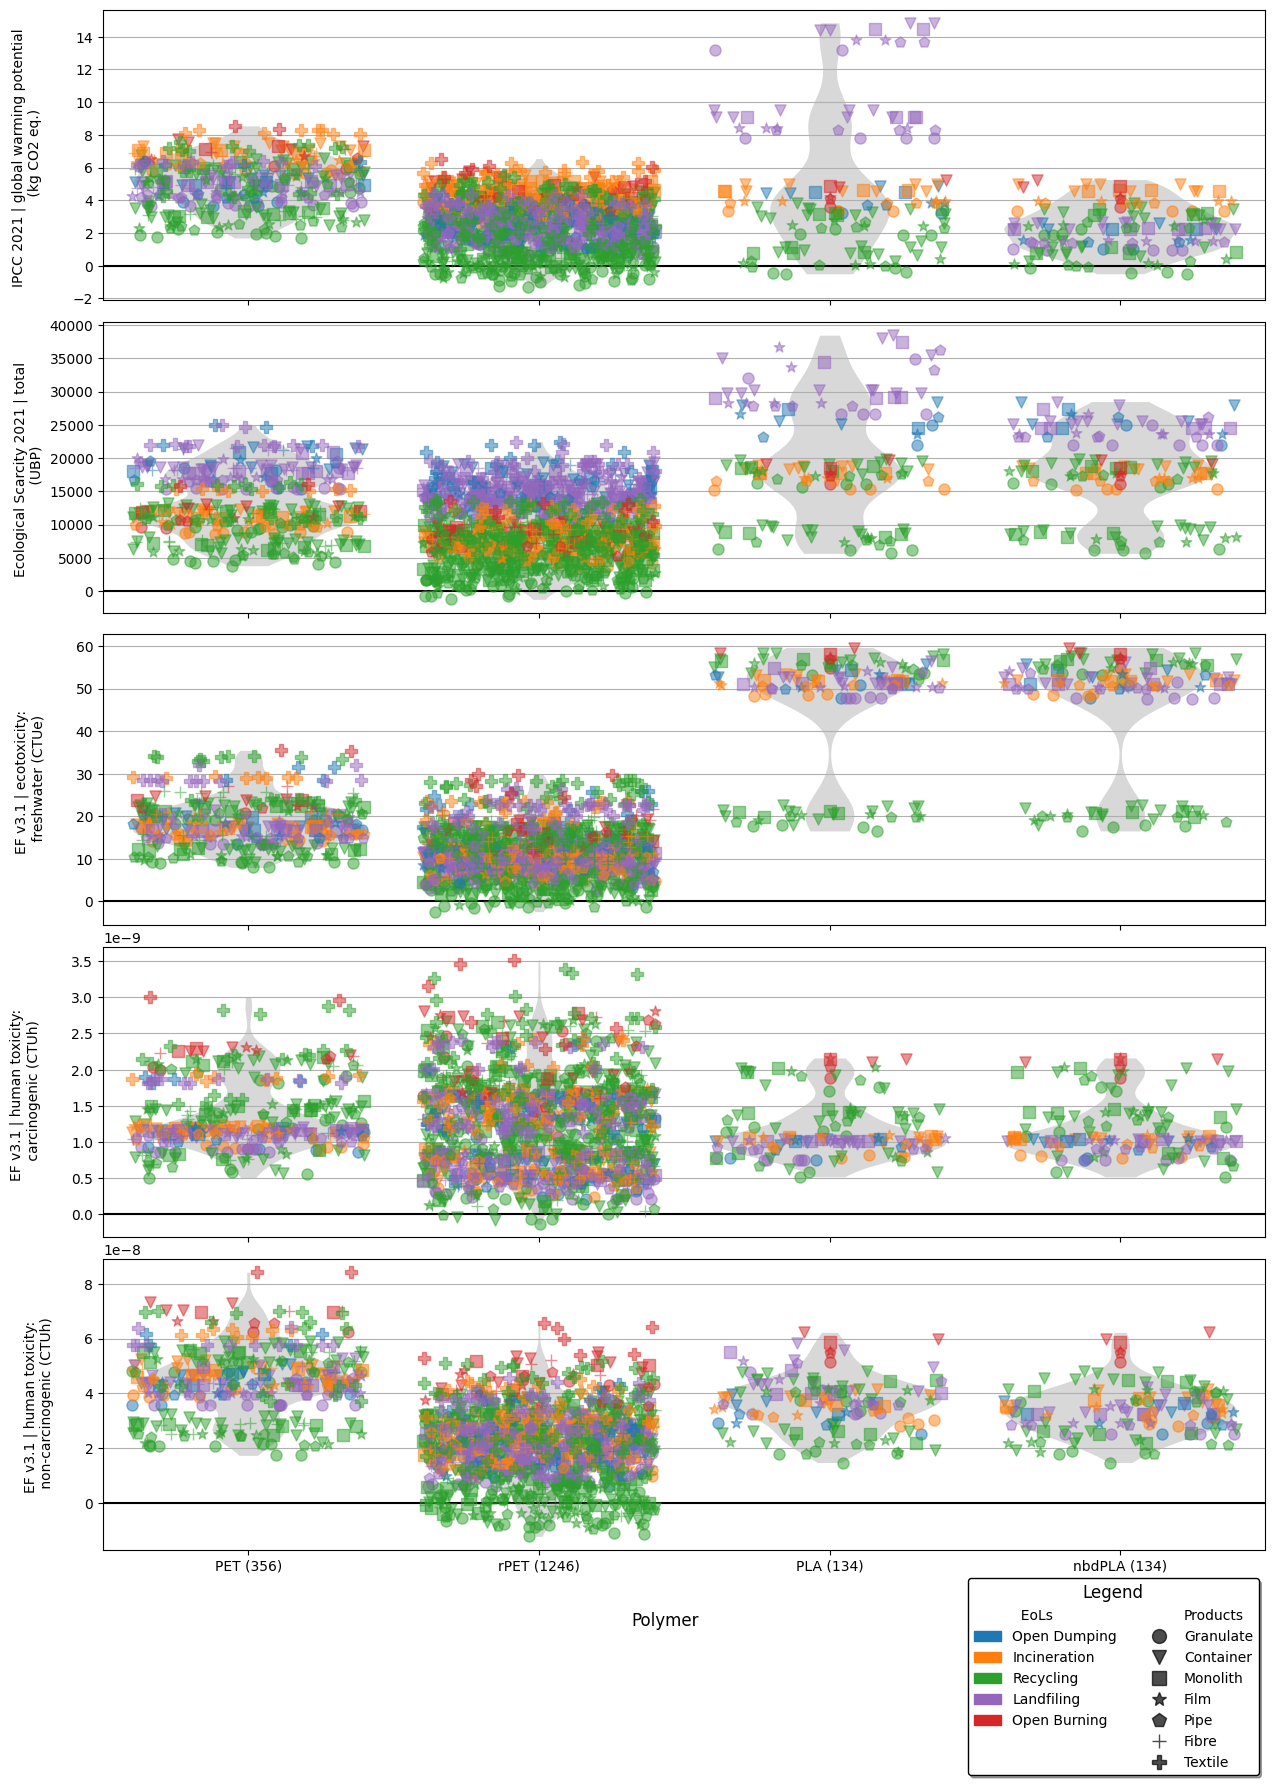

In [12]:
#7. Final LCA impacts across the four impact categories have then been plotted further for each polymer in violin plots. Each lifecycle sceanrio is distinguished on the basis of product and EoL.
rows = 5
cols = 1
fig, axes = plt.subplots(rows, cols, figsize=(15*cols,4*rows), sharex = True) #sharey = True)
plt.subplots_adjust(wspace=0.1, hspace=0.075)
plt.grid()  #just add this
fig.supxlabel('Polymer', x = 0.5, y = 0.07)
impacts = {'LCS_GWP100':'IPCC 2021 | global warming potential \n (kg CO2 eq.)', 'LCS_UBP':'Ecological Scarcity 2021 | total \n (UBP)','LCS_EcoTox':'EF v3.1 | ecotoxicity: \n freshwater (CTUe)','LCS_cHumTox':'EF v3.1 | human toxicity: \n carcinogenic (CTUh)','LCS_ncHumTox':'EF v3.1 | human toxicity: \n non-carcinogenic (CTUh)'}

polymers = {'PET': len(lcs[lcs['Polymer']=='PET']), 
            'rPET': len(lcs[lcs['Polymer']=='rPET']), 
            'PLA': len(lcs[lcs['Polymer']=='PLA']), 
            'nbdPLA': len(lcs[lcs['Polymer']=='nbdPLA'])}
ord = polymers.keys()

products = lcs['Product'].unique()
product_markers = ['o', 'v', 's', '*', 'p', '+', 'P'] 
product_eols = lcs['EoL'].unique()
product_eols_clrs = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:red']

for i, impact in zip (range(rows),impacts):
    sns.violinplot(data = lcs, x = 'Polymer', y = impact,  ax = axes[i], cut=0, inner = None, fill = True, color = 'tab:gray', alpha = 0.3, linewidth = 0, order= ['PET', 'rPET','PLA','nbdPLA'])
    axes[i].grid(True)
    if i != 1:
        axes[i].set_ylabel(impacts[impact], labelpad=22)
    else:
        axes[i].set_ylabel(impacts[impact])
    axes[i].axhline(y=0, color='black', linestyle='-')
    for product, product_marker in zip(products, product_markers):
        for product_eol, product_eols_clr in zip(product_eols, product_eols_clrs):
            sns.stripplot(data=lcs[(lcs['Product']==product) & (lcs['EoL'] == product_eol)], x='Polymer', y= impact, ax = axes[i], color = product_eols_clr, marker=product_marker, s = 8, alpha=0.5, jitter = 0.4, linewidth = 1, edgecolor = product_eols_clr)
    
    if i == 4:
        axes[i].set_xlabel("")
        axes[i].set_xticklabels(['{} ({})'.format(key, polymers[key]) for key in polymers.keys()])

# create manual symbols for legend
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
handles, labels = plt.gca().get_legend_handles_labels()

#define patches and lines to add to legend
subheading1 = plt.Line2D([], [], color='none', label='  EoLs', markersize = 10)
patch1 = mpatches.Patch(color='tab:blue', label='Open Dumping')
patch2 = mpatches.Patch(color='tab:orange', label='Incineration')
patch3 = mpatches.Patch(color='tab:green', label='Recycling')
patch4 = mpatches.Patch(color='tab:purple', label='Landfiling')  
patch5 = mpatches.Patch(color='tab:red', label='Open Burning')
subheadingx = plt.Line2D([], [], color='none', label=' ')
subheadingxx = plt.Line2D([], [], color='none', label=' ')
subheading2 = plt.Line2D([], [], color='none', label='Products')
point1 = Line2D([0], [0], label='Granulate', marker='o', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point2 = Line2D([0], [0], label='Container', marker='v', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point3 = Line2D([0], [0], label='Monolith', marker='s', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point4 = Line2D([0], [0], label='Film', marker='*', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point5 = Line2D([0], [0], label='Pipe', marker='p', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point6 = Line2D([0], [0], label='Fibre', marker='+', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point7 = Line2D([0], [0], label='Textile', marker='P', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)

#add handles
handles.extend([subheading1,patch1, patch2,patch3,patch4,patch5, subheadingx, subheadingxx,subheading2, point1, point2, point3, point4, point5, point6, point7])

#add legend
plt.legend(title_fontsize='large',     
           frameon=True,
           edgecolor='black',
           title='Legend', 
           handles=handles, loc='upper right', 
           bbox_to_anchor=(1, -0.075),
           fancybox=True, shadow=True,
           ncol=2)

plt.savefig('S2_sus_violin_plots.svg', bbox_inches = 'tight',pad_inches = 0.01)
plt.savefig('S2_sus_violin_plots.jpg', bbox_inches = 'tight',pad_inches = 0.01)

In [13]:
#8. Finally, LCA results accross the four impact categories for all lifecycle scenarios have been then stored in **lcs_summary.csv**.
lcs[['Polymer', 'Product', 'EoL', 'EoL_det','EoL_Product','LCS_GWP100', 'LCS_UBP','LCS_EcoTox', 'LCS_cHumTox', 'LCS_ncHumTox']].to_csv('sus_lcs_summary.csv')

## 9. Input Data for Safety
All preceding steps were focused solely on developing lifecycle scenarios from an environmental sustainability standpoint. The following sections shift the **focus toward the safety aspects related to plastics**. To address this, an **end-of-life (EoL) safety assessment** was carried out, aiming to link plastic pollution impacts to each lifecycle scenario. This assessment employed the method proposed by **Maga et al. (2020)**, which estimates **'Plastic Pollution Impacts' through fate factor calculations**. The resulting fate factors, corresponding to environmental releases of plastics, were compiled in the Excel file **20250430_fate_factor_calculation.xlsx** using the python script provided by Maga et al. (2020) in the Supplementry Information. Within this file, the sheet titled **FF_with_uncertainty** contains fate factors that vary according to:
1. The type of polymer and plastic
2. The form of the plastic product
3. The environmental compartment where the plastic is released

These fate factors serve as safety metrics in this assessment and complement the impact data stored in **lcs**.
## 10. All Fate Factors Imported  into **saf**
The Excel file **20250430_fate_factor_calculation.xlsx** is used to create the dataframe **saf**. The following operations for cleaning the dataframe have been performed:
1. Step 1: The fate factors over a time horizon of **100 years** were selected to distinguish between fast-degradaing and persitent plastics.
2. Step 2: Fate factors corresponding to "releases to air" were ommitted. Only releases to soils, freshwater, and marine water were considered further.
3. Step 3: Only fate factors corresponsing to polymers PET and PLA were retained in saf.
4. Step 4: The dataframe **saf** is used to import all fate factors from the relevant excel sheet. Then the dataframe is cleaned and adapted to store fate factors for **PLA, nbdPLA, PET, and rPET**. Allocation of polymer class was again done to model biodegradable and on-biodegradable polymers. Since PLA is assumed to be biodegradable, **only fate factors corresponding to soil were allocated to PLA because they were lower and could capture biodegradation as a sceanrio**. **Fate factors in marine and fresh water scenarios were only allocated to nbdPLA becuase these fate factors were higher due to limited degradatin of PLA within the resective environmental compartments**. Furthermore, the **fate factors for the release of PET to soil were taken for nbdPLA** to model persistence in soils. 
<table ><tr><th >S. No. <th><th> Environmental Flow <th><th> Polymers Alloted <tr><tr>
<tr><td> 1. <td><td> PET (emission to fresh water)<td><td> PET, rPET <td><tr>
<tr><td> 2. <td><td> PET (emission to marine water)<td><td> PET, rPET <td><tr>
<tr><td> 3. <td><td> PET (emission to soil) <td><td> PET, rPET, nbdPLA <td><tr>
<tr><td> 4. <td><td> PLA(-blend) (emission to fresh water)<td><td> nbdPLA <td><tr>
<tr><td> 5. <td><td> PLA(-blend) (emission to marine water)<td><td> nbdPLA <td><tr>
<tr><td> 6. <td><td> PLA(-blend) (emission to soil) <td><td> PLA <td><tr><table>
    
6. Step 5: Within **saf**, product categories (linked to sustainability lcs) are alloted based on the respective environmental flow given below:
<table ><tr><th >S. No. <th><th> Environmental Flow <th><th> Products Alloted <tr><tr>
<tr><td> 1. <td><td> fiber 0.01-0.1 mm<td><td> fibre <td><tr>
<tr><td> 2. <td><td> fiber 0.1-1 mm<td><td> fibre, textile <td><tr>
<tr><td> 3. <td><td> fiber 1-10 mm <td><td> fibre, textile <td><tr>
<tr><td> 4. <td><td> film 0.01-0.1 mm<td><td> film <td><tr>
<tr><td> 5. <td><td> film 0.1-1 mm<td><td> film, container, pipe <td><tr>
<tr><td> 6. <td><td> film 1-10 mm <td><td> film, container, monolith, pipe <td><tr>
<tr><td> 7. <td><td> particle 0.01-0.1 mm<td><td> granulate <td><tr>
<tr><td> 8. <td><td> particle 0.1-1 mm<td><td> granulate <td><tr>
<tr><td> 9. <td><td> particle 1-10 mm <td><td> granulate, monolith <td><tr><table>

In [14]:
# importing data and cleaning dataframe
df = pd.read_excel("20250430_fate_factor_calculation.xlsx", sheet_name="FF_with_uncertainty")
#Step 1: selecting time horizon between 100, 500, 1000, inf years
th = 100 
#General Cleaning of Datafarme
saf = df[df["Time horizon"] == th][["Environmental_flow", "FF_total"]]
saf['Polymer_org'] = saf['Environmental_flow'].str.split(' ').str[0]
saf['Product_org'] = saf['Environmental_flow'].str.split(' ').str[1]
saf['Flow'] = saf['Environmental_flow'].apply(lambda x: x.split('(')[2][:-1] if "PLA" in x
                                                         else x.split('(')[1][:-1])
#Step 2 & 3: Fate factors corresponding to "releases to air" were ommitted & Only fate factors corresponsing to polymers PET and PLA were retained in saf.
saf = saf[((saf["Polymer_org"] == 'PET') | (saf["Polymer_org"] == 'PLA(-blend)')) & (saf["Flow"] != "emission to air")] 
saf.reset_index(drop=True, inplace=True)
# Step 4: The dataframe saf is used to import all fate factors from the relevant excel sheet. Then the dataframe is cleaned and adapted to store fate factors for PLA, nbdPLA, PET, and rPET
saf["Polymer"] = saf.apply(lambda row: "PET,rPET,nbdPLA" if "PET" == row['Polymer_org'] and row['Flow'] == 'emission to soil'
                           else "PET,rPET" if "PET" == row['Polymer_org']
                           else "nbdPLA" if "PLA" in row['Polymer_org'] and row['Flow'] != 'emission to soil' #remove PLA from here if biodegradability only modelled; add PLA otherwise
                           else "PLA", axis=1)
#5. Step 5: Within **saf**, product categories (linked to sustainability lcs) are alloted based on the respective environmental flow given below:
saf["Product"] = saf.apply(lambda row: "fibre" if (row["Product_org"] == "fiber" and "0.01-0.1" in row["Environmental_flow"].split(' '))
                           else "fibre,textile" if (row["Product_org"] == "fiber" and "0.1-1" in row["Environmental_flow"].split(' '))
                           else "fibre,textile" if (row["Product_org"] == "fiber" and "1-10" in row["Environmental_flow"].split(' '))
                           else "film" if (row["Product_org"] == "film" and "0.01-0.1" in row["Environmental_flow"].split(' '))
                           else "film,container,pipe" if (row["Product_org"] == "film" and "0.1-1" in row["Environmental_flow"].split(' '))
                           else "film,container,monolith,pipe" if (row["Product_org"] == "film" and "1-10" in row["Environmental_flow"].split(' '))
                           else "granulate,monolith" if (row["Product_org"] == "particle" and "1-10" in row["Environmental_flow"].split(' '))
                           else "granulate", axis=1)
saf

Environmental_flow   FF_total  Polymer_org  \
0     PET fiber 0.01-0.1 mm (emission to fresh water)  23.877751          PET   
1    PET fiber 0.01-0.1 mm (emission to marine water)  24.165198          PET   
2            PET fiber 0.01-0.1 mm (emission to soil)  20.257751          PET   
3        PET fiber 0.1-1 mm (emission to fresh water)  86.754115          PET   
4       PET fiber 0.1-1 mm (emission to marine water)  86.754115          PET   
5               PET fiber 0.1-1 mm (emission to soil)  84.334105          PET   
6         PET fiber 1-10 mm (emission to fresh water)  98.617541          PET   
7        PET fiber 1-10 mm (emission to marine water)  98.617541          PET   
8                PET fiber 1-10 mm (emission to soil)  98.350841          PET   
9      PET film 0.01-0.1 mm (emission to fresh water)  35.816627          PET   
10    PET film 0.01-0.1 mm (emission to marine water)  36.247797          PET   
11            PET film 0.01-0.1 mm (emission to soil)  30.386626          PET   
12        PET film 0.1-1 mm (emission to fresh water)  93.055556          PET   
13       PET film 0.1-1 mm (emission to marine water)  93.055556          PET   
14               PET film 0.1-1 mm (emission to soil)  91.708333          PET   
15         PET film 1-10 mm (emission to fresh water)  99.305556          PET   
16        PET film 1-10 mm (emission to marine water)  99.305556          PET   
17                PET film 1-10 mm (emission to soil)  99.170833          PET   
18  PET particle 0.01-0.1 mm (emission to fresh wa...  17.908313          PET   
19  PET particle 0.01-0.1 mm (emission to marine w...  18.123899          PET   
20        PET particle 0.01-0.1 mm (emission to soil)  15.193313          PET   
21    PET particle 0.1-1 mm (emission to fresh water)  81.028699          PET   
22   PET particle 0.1-1 mm (emission to marine water)  81.028699          PET   
23           PET particle 0.1-1 mm (emission to soil)  77.763037          PET   
24     PET particle 1-10 mm (emission to fresh water)  97.935890          PET   
25    PET particle 1-10 mm (emission to marine water)  97.935890          PET   
26            PET particle 1-10 mm (emission to soil)  97.539909          PET   
27  PLA(-blend) fiber 0.01-0.1 mm (emission to fre...  99.774912  PLA(-blend)   
28  PLA(-blend) fiber 0.01-0.1 mm (emission to mar...  99.774912  PLA(-blend)   
29   PLA(-blend) fiber 0.01-0.1 mm (emission to soil)   3.198694  PLA(-blend)   
30  PLA(-blend) fiber 0.1-1 mm (emission to fresh ...  99.977476  PLA(-blend)   
31  PLA(-blend) fiber 0.1-1 mm (emission to marine...  99.977476  PLA(-blend)   
32      PLA(-blend) fiber 0.1-1 mm (emission to soil)   5.053788  PLA(-blend)   
33  PLA(-blend) fiber 1-10 mm (emission to fresh w...  99.997747  PLA(-blend)   
34  PLA(-blend) fiber 1-10 mm (emission to marine ...  99.997747  PLA(-blend)   
35       PLA(-blend) fiber 1-10 mm (emission to soil)  23.544565  PLA(-blend)   
36  PLA(-blend) film 0.01-0.1 mm (emission to fres...  99.887371  PLA(-blend)   
37  PLA(-blend) film 0.01-0.1 mm (emission to mari...  99.887371  PLA(-blend)   
38    PLA(-blend) film 0.01-0.1 mm (emission to soil)   3.304791  PLA(-blend)   
39  PLA(-blend) film 0.1-1 mm (emission to fresh w...  99.988737  PLA(-blend)   
40  PLA(-blend) film 0.1-1 mm (emission to marine ...  99.988737  PLA(-blend)   
41       PLA(-blend) film 0.1-1 mm (emission to soil)   6.081357  PLA(-blend)   
42  PLA(-blend) film 1-10 mm (emission to fresh wa...  99.998874  PLA(-blend)   
43  PLA(-blend) film 1-10 mm (emission to marine w...  99.998874  PLA(-blend)   
44        PLA(-blend) film 1-10 mm (emission to soil)  33.816916  PLA(-blend)   
45  PLA(-blend) particle 0.01-0.1 mm (emission to ...  99.662621  PLA(-blend)   
46  PLA(-blend) particle 0.01-0.1 mm (emission to ...  99.662621  PLA(-blend)   
47  PLA(-blend) particle 0.01-0.1 mm (emission to ...   3.143963  PLA(-blend)   
48  PLA(-blend) particle 0.1-1 mm (emission to fre...  99.966217  

## 11. All EoL Safety Scenarios Stored  in **saf_lcs**
After prepearing the fate factors in **saf**, it was important to marry them with the EoLs from the lifecycle scenarios. Since the fate factors correspond to environmental compartments, 3 **release factors from each EoL** were assumed and further multiplied to the fate factors to obtain individual EoL saftey scenarios:
1. The **more open or uncontrolled the EoL, higher the release fators**.
2. due to the possibility of drainage during rains, **wet EoLs recieve higher release factors**.

<table ><tr><th >S. No. <th><th> EoL Treatment <th><th> Assumed Release Factors<tr><tr>
<tr><td> 1. <td><td> Dry Open Dump <td><td> 25%, 50%, 75% <td><tr>
<tr><td> 2. <td><td> Wet Open Dump <td><td> 50%, 75%, 100% <td><tr>
<tr><td> 3. <td><td> Municipal Incineration <td><td> 0.1%, 0.5%, 1% <td><tr>
<tr><td> 4. <td><td> Recycling <td><td> 1%, 2.5%, 5% <td><tr>
<tr><td> 5. <td><td> Open Burning <td><td> 5%, 10%, 25% <td><tr>
<tr><td> 6. <td><td> Unsanitary Landfilling <td><td> 1%, 5%, 10% <td><tr>
<tr><td> 7. <td><td> Sanitary Landfilling <td><td> 0.5%, 2.5%, 5% <td><tr><table>
    
The above table contains the release factors corresponding to each EoL. There are 3 release factors condered for each EoL: lower (best case), middle, and higher (worst case). A release factor of 75% implies that 75% of the input to the EoL treatment is released to the environment. These release scenarios were combined with the fate factors, which resulted in all possible EoL saftey scenarios in dataframe **saf_lcs** which was further stored in **saf_lcs_summary.csv**.

In [15]:
# Defining EoL release factors
eol_dets = {'dry_open_dump':[0.25,0.5,0.75],
       'wet_open_dump':[0.5,0.75,1],
       'm_incineration_fae':[0.001,0.005,0.01],
       'm_incineration':[0.001,0.005,0.01],
       'recycling':[0.01,0.025,0.05],
       'burning':[0.05,0.1,0.25],
       'unsan_landfilling':[0.01,0.05,0.1],
       'san_landfilling':[0.005,0.025,0.05],
      }
eols = ['dumping','dumping','incineration','incineration', 'recycling','burning','landfilling','landfilling']
#creating all EoL saftey scenarios 
all_rows = []
for i1, r1 in saf.iterrows():
    for eol_det, eol in zip(eol_dets.items(), eols):
        for release_factor in eol_det[1]:
            new_row = {'Polymer': r1['Polymer'], 'Flow': r1['Flow'], 'Product': r1['Product'], 'EoL':eol, 'EoL_det':eol_det[0], 'Release_Factor':release_factor, 'FF_total': r1['FF_total'],
            'corr_FF_total': r1['FF_total']*release_factor}
            all_rows.append(new_row)
saf_lcs = pd.DataFrame(all_rows)
#exporting all EoL safety data to a file
saf_lcs.to_csv('saf_lcs_summary.csv')
saf_lcs

Polymer                     Flow             Product          EoL  \
0     PET,rPET  emission to fresh water               fibre      dumping   
1     PET,rPET  emission to fresh water               fibre      dumping   
2     PET,rPET  emission to fresh water               fibre      dumping   
3     PET,rPET  emission to fresh water               fibre      dumping   
4     PET,rPET  emission to fresh water               fibre      dumping   
...        ...                      ...                 ...          ...   
1291       PLA         emission to soil  granulate,monolith  landfilling   
1292       PLA         emission to soil  granulate,monolith  landfilling   
1293       PLA         emission to soil  granulate,monolith  landfilling   
1294       PLA         emission to soil  granulate,monolith  landfilling   
1295       PLA         emission to soil  granulate,monolith  landfilling   

                EoL_det  Release_Factor   FF_total  corr_FF_total  
0         dry_open_dump           0.250  23.877751       5.969438  
1         dry_open_dump           0.500  23.877751      11.938876  
2         dry_open_dump           0.750  23.877751      17.908313  
3         wet_open_dump           0.500  23.877751      11.938876  
4         wet_open_dump           0.750  23.877751      17.908313  
...                 ...             ...        ...            ...  
1291  unsan_landfilling           0.050  18.408373       0.920419  
1292  unsan_landfilling           0.100  18.408373       1.840837  
1293    san_landfilling           0.005  18.408373       0.092042  
1294    san_landfilling           0.025  18.408373       0.460209  
1295    san_landfilling           0.050  18.408373       0.920419  

[1296 rows x 8 columns]

## 12. Combining Results from Lifecycle Sustainability and EoL Safety Scenarios into **saf_sus_lcs**
In the final step, all the resulting lifecycle and EoL scenarios were combined into the dataframe **saf_sus_lcs**. The following steps were undertake here:
1. Previously generated and exported Lifecycle and EoL scenarios were re-imported. The table summarizes the imported data:
<table><tr><th >S. No. <th><th> Assessment <th><th> Focus <th><th> Dataframe<th><th> Number of Scenarios<th><tr>
<tr><td> 1. <td><td> GWP100, UBP, EcoTox and HumanTox Impacts from LCA (Sustainability) <td><td> All Plastics Lifecycles <td><td> sus_lcs <td><td> 1870 <td><tr>
<tr><td> 2. <td><td> FF scenario analysis as a proxy for persistence (Safety) <td><td> All EoLs of Plastics <td><td> saf_lcs <td><td> 1296 <td><tr><table>
    
2. **saf_sus_lcs** was created by combining all lifecycle scenarios within **sus_lcs** and **saf_lcs**. In total, **37659 valid saftey and sustainbility scenarios** for PET, rPET, PLA, and nbdPA have been modelled. Only valid lifecycle scenarios were stored in **saf_sus_lcs** based on:
   * **Condition 1**: Polymer type consistent across lifecycle and EoL scenarios
   * **Condition 2**: Product consistent across lifecycle and EoL scenarios
   * **Condition 3**: EoL consistent across lifecycle and EoL scenarios   

3. The **37659** saftey and sustainbility scenarios for PET, rPET, PLA, and nbdPLA within **saf_sus_lcs** then exported and saved into the csv **saf_sus_lcs_summary.csv**.
<table><tr><th >S. No. <th><th> Assessment <th><th> Focus <th><th> Dataframe<th><th> Number of Scenarios<th><tr>
<tr><td> 3. <td><td> Safety and Sustaianbility assessment <td><td> All lifecycle scenarios and EoLs of Plastics <td><td> saf_sus_lcs <td><td> 37659 <td><tr><table>

4. Then we **plot the distribution of the plastic pollution impacts for each lifecycle sceanrio**. 2 plots are produced, **focusing on the EoL treatment and release** respectively for each polymer.
5. Then correlation testing done for all the sustainability and safety scores compiled within te lifecycle scenarios. **The goal is to ensure low correlation to apply multi-objective optimzation apporahc**.
6. The correlation testing is further repeated per polymer class across saftey and sustianbility scores to see whether **higher correlations are observed for specific polymers**.
7. Then final bi-variate plots for safety and sustianbility are plotted per polymer.
8. Finally, the bi-variate plots for safety and sustianbility are plotted per product class. 

In [16]:
#1. Previously generated and exported Lifecycle and EoL scenarios were re-imported.
sus_lcs = pd.read_csv('sus_lcs_summary.csv')
saf_lcs = pd.read_csv('saf_lcs_summary.csv')
#2. **saf_sus_lcs** was created by combining all lifecycle scenarios within **sus_lcs** and **saf_lcs**.
all_rows = []
for i1, r1 in sus_lcs.iterrows():
    for i2, r2 in saf_lcs.iterrows():
        if (r1['Polymer'] in r2['Polymer'].split(',')) and (r1['Product'] in r2['Product'].split(',')) and ( r1['EoL'] == r2['EoL']) and ( r1['EoL_det'] == r2['EoL_det']):
            new_row = {'Polymer': r1['Polymer'], 'Product': r1['Product'], 'EoL': r1['EoL'], 'EoL_det':r1['EoL_det'], 'EoL_Product':r1['EoL_Product'], 'GWP100':r1['LCS_GWP100'],'UBP':r1['LCS_UBP'], 'EcoTox':r1['LCS_EcoTox'], 'cHumTox':r1['LCS_cHumTox'],'ncHumTox':r1['LCS_ncHumTox'],
                       'Polymer_FF': r2['Polymer'], 'Product_FF': r2['Product'], 'EoL_FF': r2['EoL'], 'EoL_det_FF':r2['EoL_det'], 'Flow_FF': r2['Flow'], 'RF_FF':r2['Release_Factor'], 'PPI100':r2['corr_FF_total']}
            all_rows.append(new_row)
saf_sus_lcs = pd.DataFrame(all_rows)
#3. The **37818** saftey and sustainbility scenarios for PET, rPET, PLA, and nbdPLA within **saf_sus_lcs** then exported and saved into the csv **saf_sus_lcs_summary.csv**.
saf_sus_lcs = saf_sus_lcs[['Polymer', 'Product', 'EoL', 'EoL_det','EoL_Product','Flow_FF','RF_FF','GWP100', 'UBP','EcoTox', 'cHumTox', 'ncHumTox','PPI100']]
saf_sus_lcs.to_csv('saf_sus_lcs_summary.csv')
saf_sus_lcs

Polymer    Product        EoL        EoL_det EoL_Product  \
0         PLA  granulate    dumping  wet_open_dump  no product   
1         PLA  granulate    dumping  wet_open_dump  no product   
2         PLA  granulate    dumping  wet_open_dump  no product   
3         PLA  granulate    dumping  wet_open_dump  no product   
4         PLA  granulate    dumping  wet_open_dump  no product   
...       ...        ...        ...            ...         ...   
37654  nbdPLA       pipe  recycling      recycling    recycled   
37655  nbdPLA       pipe  recycling      recycling    recycled   
37656  nbdPLA       pipe  recycling      recycling    recycled   
37657  nbdPLA       pipe  recycling      recycling    recycled   
37658  nbdPLA       pipe  recycling      recycling    recycled   

                        Flow_FF  RF_FF    GWP100           UBP     EcoTox  \
0              emission to soil  0.500  3.217287  21986.935180  47.811744   
1              emission to soil  0.750  3.217287  21986.935180  47.811744   
2              emission to soil  1.000  3.217287  21986.935180  47.811744   
3              emission to soil  0.500  3.217287  21986.935180  47.811744   
4              emission to soil  0.750  3.217287  21986.935180  47.811744   
...                         ...    ...       ...           ...        ...   
37654   emission to fresh water  0.025 -0.062681   6905.782126  18.766646   
37655   emission to fresh water  0.050 -0.062681   6905.782126  18.766646   
37656  emission to marine water  0.010 -0.062681   6905.782126  18.766646   
37657  emission to marine water  0.025 -0.062681   6905.782126  18.766646   
37658  emission to marine water  0.050 -0.062681   6905.782126  18.766646   

            cHumTox      ncHumTox    PPI100  
0      7.521013e-10  2.515215e-08  1.571982  
1      7.521013e-10  2.515215e-08  2.357973  
2      7.521013e-10  2.515215e-08  3.143963  
3      7.521013e-10  2.515215e-08  2.269917  
4      7.521013e-10  2.515215e-08  3.404875  
...             ...           ...       ...  
37654  6.623373e-10  1.808735e-08  2.499972  
37655  6.623373e-10  1.808735e-08  4.999944  
37656  6.623373e-10  1.808735e-08  0.999989  
37657  6.623373e-10  1.808735e-08  2.499972  
37658  6.623373e-10  1.808735e-08  4.999944  

[37659 rows x 13 columns]

C:\Users\PhDLife\AppData\Local\Temp\ipykernel_13552\4183397026.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['{} ({})'.format(key, polymers[key]) for key in polymers.keys()])


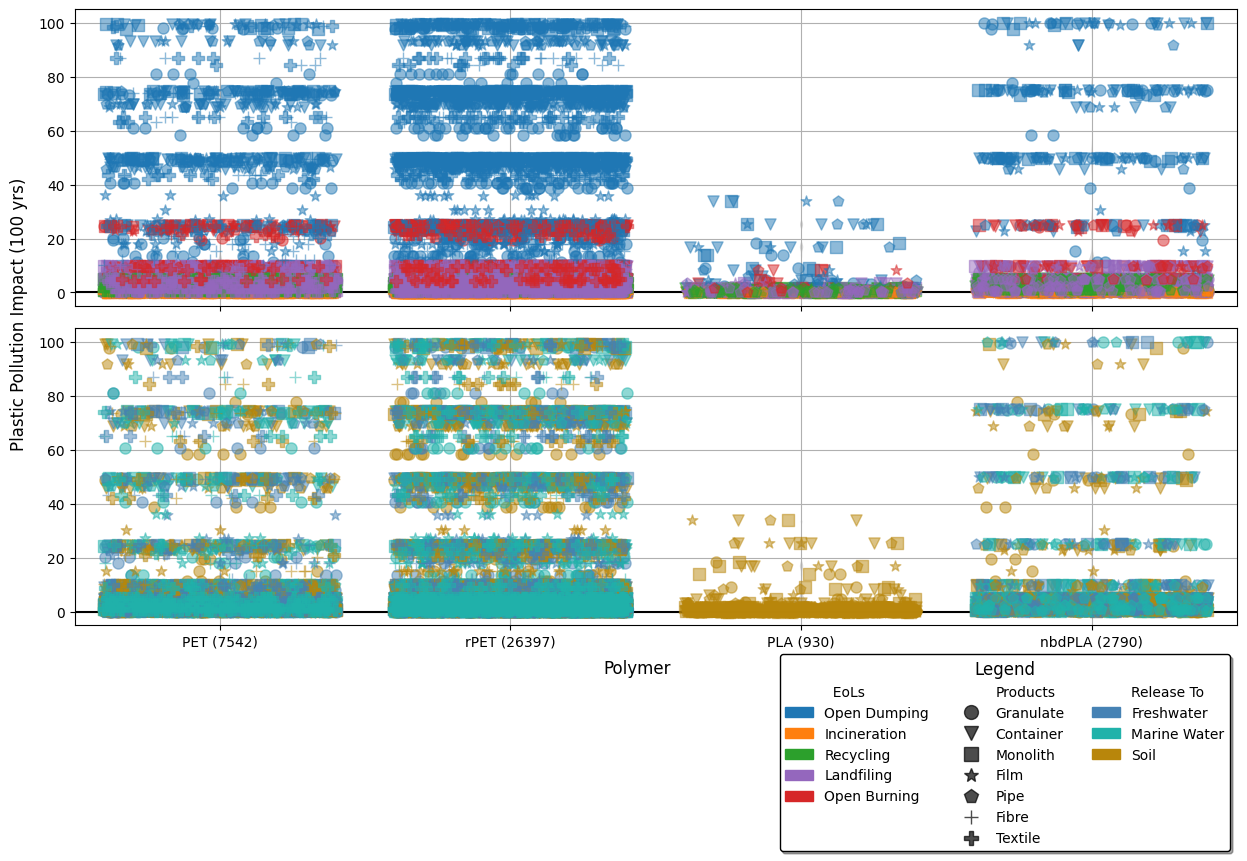

In [17]:
#4. Then we **plot the distribution of the plastic pollution impacts for each lifecycle sceanrio**. 2 plots are produced, **focusing on the EoL treatment and release** respecively for each polymer
rows = 2
cols = 1
fig, axes = plt.subplots(rows, cols, figsize=(15*cols,4*rows), sharex = True, sharey = True)
plt.subplots_adjust(wspace=0.1, hspace=0.075)
plt.grid()  #just add this
fig.supxlabel('Polymer', x = 0.5, y = 0.045)
fig.supylabel('Plastic Pollution Impact (100 yrs)', x = 0.082, y = 0.5)

products = saf_sus_lcs['Product'].unique()
product_markers = ['o', 'v', 's', '*', 'p', '+', 'P'] 
product_eols = saf_sus_lcs['EoL'].unique()
product_eols_clrs = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:red']
env_comps = saf_sus_lcs['Flow_FF'].unique()
env_comps_clrs = ['darkgoldenrod','steelblue','lightseagreen']

#'emission to soil', 'emission to fresh water', 'emission to marine water'
polymers = {'PET': len(saf_sus_lcs[saf_sus_lcs['Polymer']=='PET']), 
            'rPET': len(saf_sus_lcs[saf_sus_lcs['Polymer']=='rPET']), 
            'PLA': len(saf_sus_lcs[saf_sus_lcs['Polymer']=='PLA']), 
            'nbdPLA': len(saf_sus_lcs[saf_sus_lcs['Polymer']=='nbdPLA'])}

for i in range(rows):
    sns.violinplot(data = saf_sus_lcs, x = 'Polymer', y = 'PPI100',  ax = axes[i], cut=0, inner = None, fill = True, color = 'tab:gray', alpha = 0.3, linewidth = 0, order= ['PET', 'rPET','PLA','nbdPLA'])

    if i == 0:
        for product, product_marker in zip(products, product_markers):
            for product_eol, product_eols_clr in zip(product_eols, product_eols_clrs):
                sns.stripplot(data=saf_sus_lcs[(saf_sus_lcs['Product']==product) & (saf_sus_lcs['EoL'] == product_eol)], x='Polymer', y= 'PPI100', ax = axes[i], color = product_eols_clr, marker=product_marker, s = 8, alpha=0.5, jitter = 0.4, linewidth = 1, edgecolor = product_eols_clr)
    if i == 1:
        axes[i].set_xlabel("")
        axes[i].set_xticklabels(['{} ({})'.format(key, polymers[key]) for key in polymers.keys()])
        for product, product_marker in zip(products, product_markers):
            for env_comp, env_comps_clr in zip(env_comps, env_comps_clrs):
                sns.stripplot(data=saf_sus_lcs[(saf_sus_lcs['Product']==product) & (saf_sus_lcs['Flow_FF'] == env_comp)], x='Polymer', y= 'PPI100', ax = axes[i], color = env_comps_clr, marker=product_marker, s = 8, alpha=0.5, jitter = 0.4, linewidth = 1, edgecolor = env_comps_clr)
           
    axes[i].axhline(y=0, color='black', linestyle='-')
    axes[i].grid(True)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# create manual symbols for legend
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
handles, labels = plt.gca().get_legend_handles_labels()

#define patches and lines to add to legend
subheading1 = plt.Line2D([], [], color='none', label='  EoLs', markersize = 10)
patch1 = mpatches.Patch(color='tab:blue', label='Open Dumping')
patch2 = mpatches.Patch(color='tab:orange', label='Incineration')
patch3 = mpatches.Patch(color='tab:green', label='Recycling')
patch4 = mpatches.Patch(color='tab:purple', label='Landfiling')  
patch5 = mpatches.Patch(color='tab:red', label='Open Burning')
subheadingx = plt.Line2D([], [], color='none', label=' ')
subheadingxx = plt.Line2D([], [], color='none', label=' ')
subheadingxxx = plt.Line2D([], [], color='none', label=' ')
subheading2 = plt.Line2D([], [], color='none', label='Products')
point1 = Line2D([0], [0], label='Granulate', marker='o', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point2 = Line2D([0], [0], label='Container', marker='v', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point3 = Line2D([0], [0], label='Monolith', marker='s', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point4 = Line2D([0], [0], label='Film', marker='*', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point5 = Line2D([0], [0], label='Pipe', marker='p', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point6 = Line2D([0], [0], label='Fibre', marker='+', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point7 = Line2D([0], [0], label='Textile', marker='P', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
subheading3 = plt.Line2D([], [], color='none', label='Release To')
patch8 = mpatches.Patch(color='steelblue', label='Freshwater')
patch9 = mpatches.Patch(color='lightseagreen', label='Marine Water')
patch10 = mpatches.Patch(color='darkgoldenrod', label='Soil')

#add handles
handles.extend([subheading1,patch1, patch2,patch3,patch4,patch5,subheadingx, subheadingx, subheading2, point1, point2, point3, point4, point5, point6, point7, subheading3, patch8, patch9, patch10, subheadingxxx, subheadingx, subheadingx, subheadingx])

#add legend
plt.legend(title_fontsize='large',     
           frameon=True,
           edgecolor='black',
           title='Legend', 
           handles=handles, loc='upper right', 
           bbox_to_anchor=(1, -0.075),
           fancybox=True, shadow=True,
           ncol=3)

plt.savefig('S3_saf_violin_plots.svg', bbox_inches = 'tight',pad_inches = 0.01)
plt.savefig('S3_saf_violin_plots.jpg', bbox_inches = 'tight',pad_inches = 0.01)

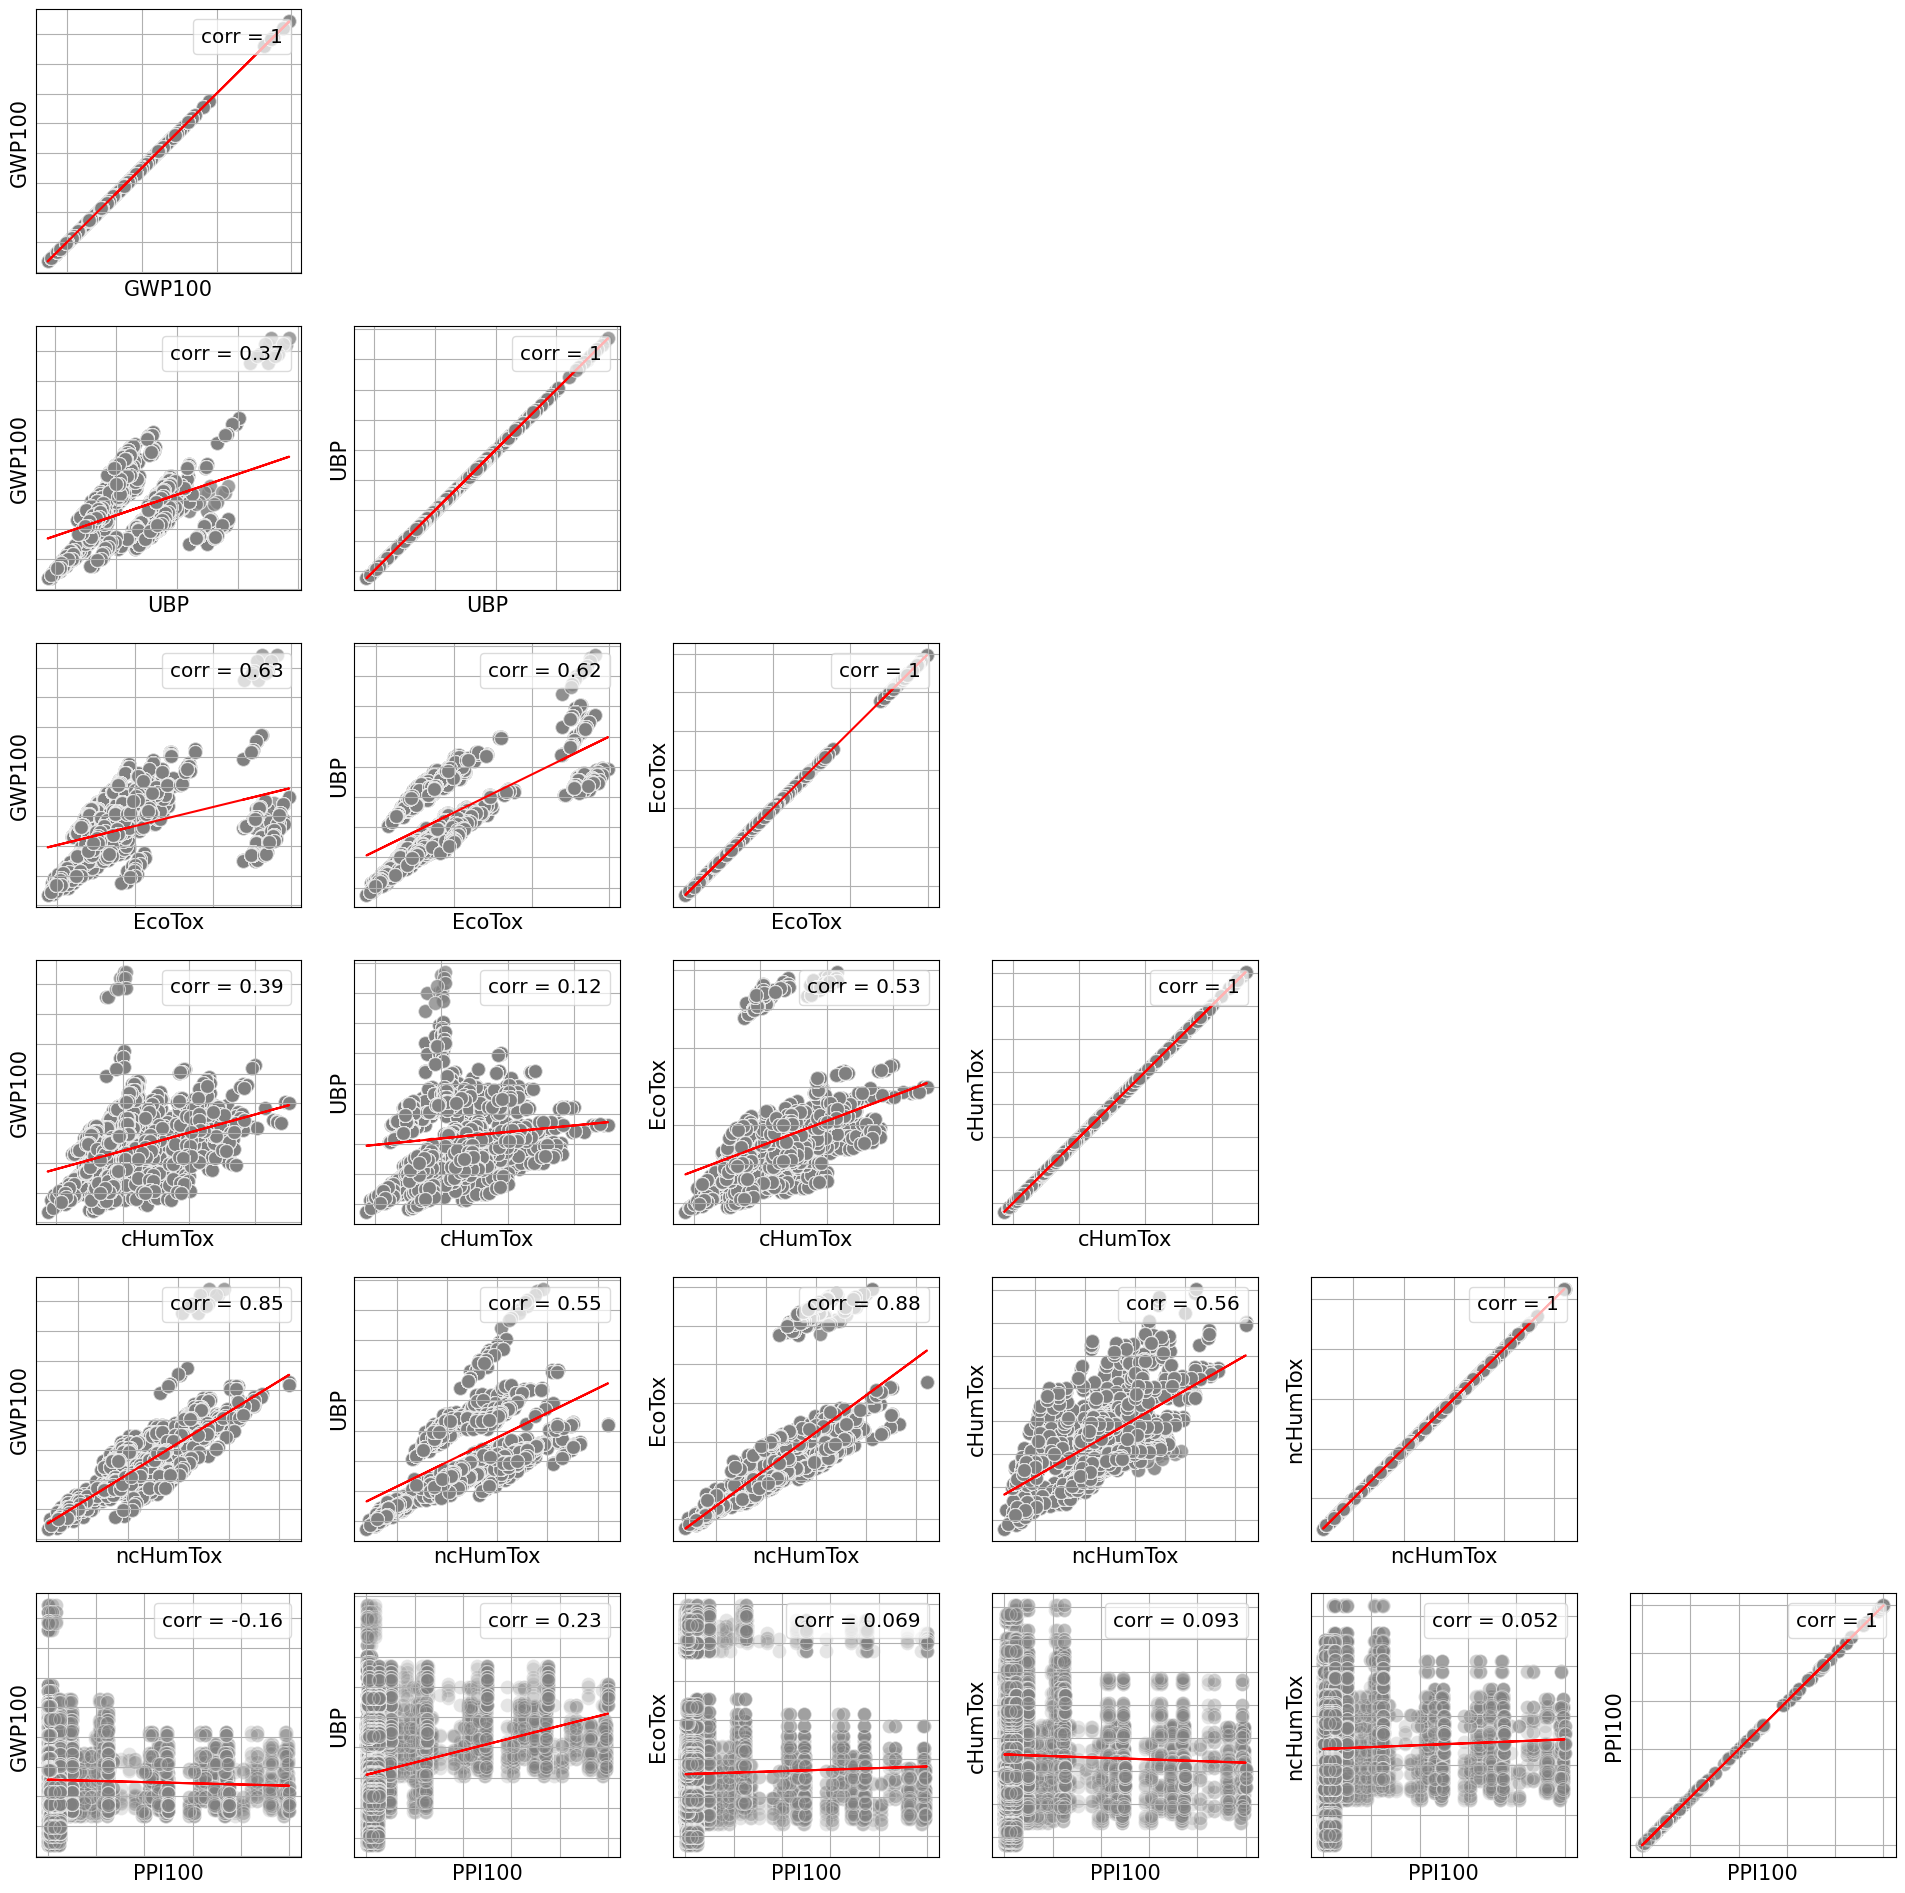

In [18]:
#5. Then correlation testing done for all the sustainability and safety scores compiled within te lifecycle scenarios. **The goal is to ensure low correlation to apply multi-objective optimzation apporahc**.
rows = 6 #GWP100, UBP, EcoTox, cHumTox, ncHumTox, PPI100
cols = 6 #GWP100, UBP, EcoTox, cHumTox, ncHumTox, PPI100
fig, axes = plt.subplots(rows, cols, figsize=(4*cols,4*rows))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
impacts = saf_sus_lcs.columns[7:].tolist()
for i, impact_row in zip(range(rows), impacts):
    for j, impact_col in zip(range(cols), impacts):

        if j <= i:
            sns.scatterplot(data=saf_sus_lcs, x=impact_row, y=impact_col,ax = axes[i][j],alpha = 0.2, s=100,color = 'gray')
            axes[i][j].grid(True)
            axes[i][j].tick_params(axis='x', labelbottom=False, bottom=False)
            axes[i][j].tick_params(axis='y', labelleft=False, left=False)
            #axes[i][j].set_ylim([saf_sus_lcs[sus_impact].min(), saf_sus_lcs[sus_impact].max()])
            #axes[i][j].set_xlim([saf_sus_lcs[sus_impact].min(), saf_sus_lcs[sus_impact].max()])
            labels = []
            if i == j:
                labels.append("corr = 1")
            else:
                labels.append("corr = {0:.2g}".format(saf_sus_lcs[[impact_row,impact_col]].corr(method='spearman')[impact_col].iloc[0]))
            #labels.append("root(2) = {0:.4g}".format(np.sqrt(2)))
            axes[i][j].legend(handles, labels, loc='upper right', fontsize='x-large', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
            slope, intercept = np.polyfit(saf_sus_lcs[impact_row], saf_sus_lcs[impact_col], 1)  # Degree 1 for a linear fit
            line = slope * saf_sus_lcs[impact_row] + intercept
            axes[i][j].plot(saf_sus_lcs[impact_row], line, color='red', label=f'Fit: y={slope:.2f}x+{intercept:.2f}')
            axes[i][j].set_ylabel(impact_col, fontsize=15)
            axes[i][j].set_xlabel(impact_row, fontsize=15)
        else:
            axes[i][j].axis('off')
            
plt.savefig('S4_corr_test.svg', bbox_inches = 'tight',pad_inches = 0.01)
plt.savefig('S4_corr_test.jpg', bbox_inches = 'tight',pad_inches = 0.01)           
        

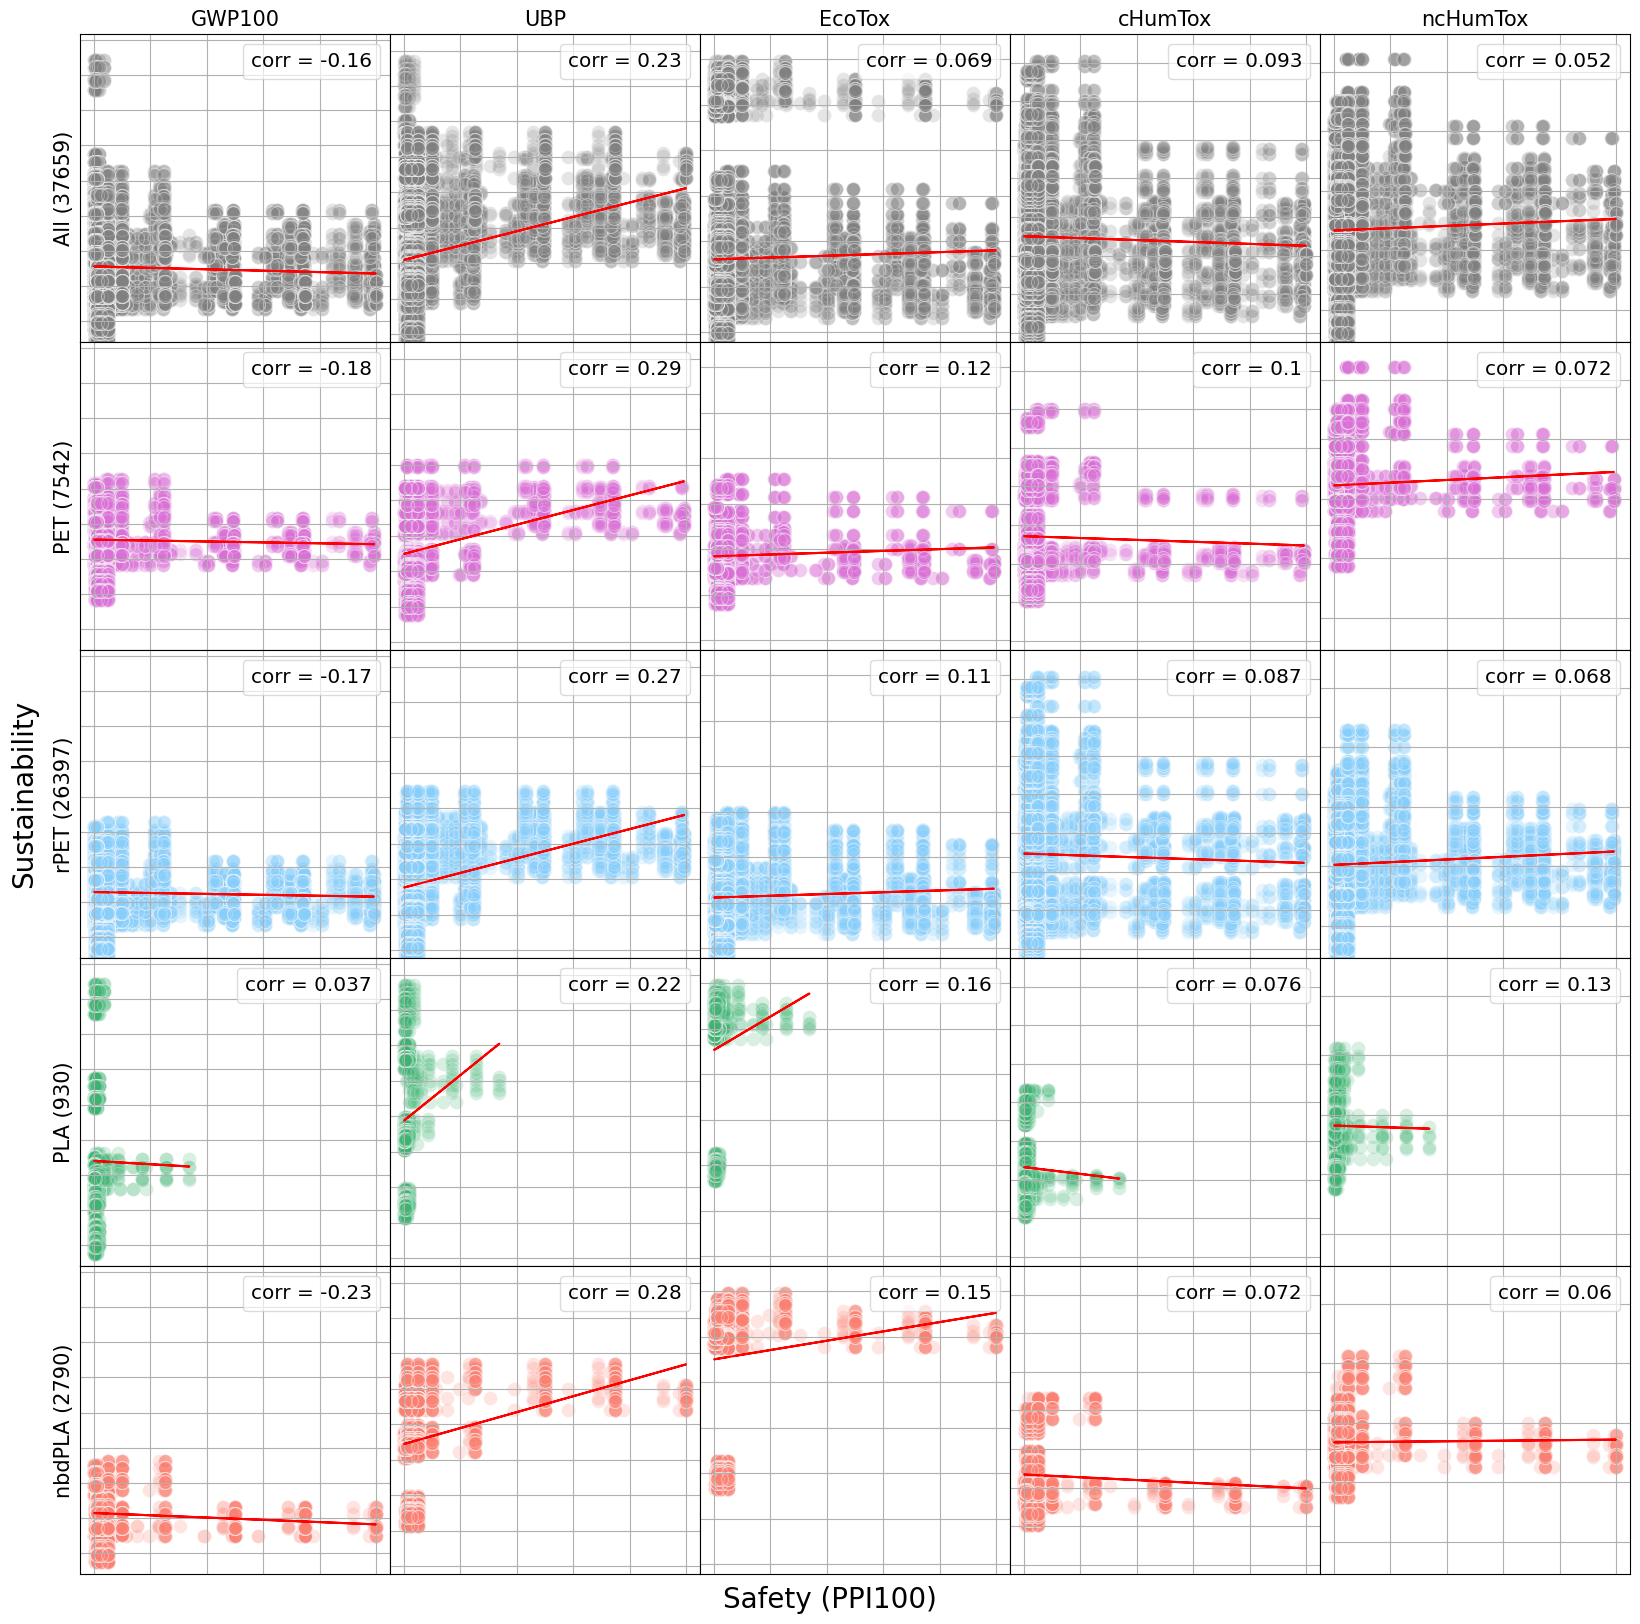

In [19]:
#6. The correlation testing is further repeated per polymer class across saftey and sustianbility scores to see whether **higher correlations are observed for specific polymers**.
rows = 5 #all, PET, rPET, PLA, nbdPLA
cols = 5 #GWP100, UBP, EcoTox, cHumTox, ncHumTox
fig, axes = plt.subplots(rows, cols, figsize=(4*cols,4*rows), sharex = True) #sharey = True)
plt.subplots_adjust(wspace=0, hspace=0)
#plt.grid()  #just add this
fig.supxlabel('Safety (PPI100)', fontsize=20, x = 0.5, y = 0.09)
fig.supylabel('Sustainability', fontsize=20, x = 0.09, y = 0.5)

polymers = {'All': len(saf_sus_lcs),
            'PET': len(saf_sus_lcs[saf_sus_lcs['Polymer']=='PET']), 
            'rPET': len(saf_sus_lcs[saf_sus_lcs['Polymer']=='rPET']), 
            'PLA': len(saf_sus_lcs[saf_sus_lcs['Polymer']=='PLA']), 
            'nbdPLA': len(saf_sus_lcs[saf_sus_lcs['Polymer']=='nbdPLA'])}
polymers_clrs = ['gray','orchid','lightskyblue','mediumseagreen','salmon']
sus_impacts = saf_sus_lcs.columns[7:12].tolist()
saf_impacts = saf_sus_lcs.columns[12]

for i, polymer, polymers_clr in zip(range(rows), polymers.keys(),polymers_clrs) :    
    for j, sus_impact in zip(range(cols),sus_impacts):
        if i == 0:
            sns.scatterplot(data=saf_sus_lcs, x=saf_impacts, y=sus_impact,ax = axes[i][j],alpha = 0.2, s=100,color = polymers_clr)
            axes[i][j].set_title('{}'.format(sus_impact), fontsize=15)
            axes[i][j].grid(True)
            axes[i][j].set_xlabel('')
            axes[i][j].set_ylabel('')
            axes[i][j].tick_params(axis='x', labelbottom=False, bottom=False)
            axes[i][j].tick_params(axis='y', labelleft=False, left=False)
            axes[i][j].set_ylim([0.9*saf_sus_lcs[sus_impact].min(), 1.1*saf_sus_lcs[sus_impact].max()])
            labels = []
            labels.append("corr = {0:.2g}".format(saf_sus_lcs[[sus_impact,saf_impacts]].corr(method='spearman')[sus_impact].iloc[1]))
            #labels.append("root(2) = {0:.4g}".format(np.sqrt(2)))
            axes[i][j].legend(handles, labels, loc='upper right', fontsize='x-large', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
            slope, intercept = np.polyfit(saf_sus_lcs[saf_impacts], saf_sus_lcs[sus_impact], 1)  # Degree 1 for a linear fit
            line = slope * saf_sus_lcs[saf_impacts] + intercept
            axes[i][j].plot(saf_sus_lcs[saf_impacts], line, color='red', label=f'Fit: y={slope:.2f}x+{intercept:.2f}')
            
        else:
            filtered_data = saf_sus_lcs[saf_sus_lcs['Polymer']==polymer]
            sns.scatterplot(data=filtered_data, x=saf_impacts, y=(sus_impact),ax = axes[i][j],alpha = 0.2, s=100,color = polymers_clr)
            axes[i][j].grid(True)
            axes[i][j].set_xlabel('')
            axes[i][j].set_ylabel('')
            axes[i][j].tick_params(axis='x', labelbottom=False, bottom=False)
            axes[i][j].tick_params(axis='y', labelleft=False, left=False)
            axes[i][j].set_ylim([0.9*saf_sus_lcs[sus_impact].min(), 1.1*saf_sus_lcs[sus_impact].max()])
            labels = []
            labels.append("corr = {0:.2g}".format(filtered_data[[sus_impact,saf_impacts]].corr(method='spearman')[sus_impact].iloc[1]))
            #labels.append("root(2) = {0:.4g}".format(np.sqrt(2)))
            axes[i][j].legend(handles, labels, loc='upper right', fontsize='x-large', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
            slope, intercept = np.polyfit(filtered_data[saf_impacts], filtered_data[sus_impact], 1)  # Degree 1 for a linear fit
            line = slope * filtered_data[saf_impacts] + intercept
            axes[i][j].plot(filtered_data[saf_impacts], line, color='red', label=f'Fit: y={slope:.2f}x+{intercept:.2f}')
                        
        if j == 0:
            axes[i][j].set_ylabel('{} ({})'.format(polymer,polymers[polymer]), fontsize=15)
            
plt.savefig('S5_corr_test2.svg', bbox_inches = 'tight',pad_inches = 0.01)
plt.savefig('S5_corr_test2.jpg', bbox_inches = 'tight',pad_inches = 0.01)           

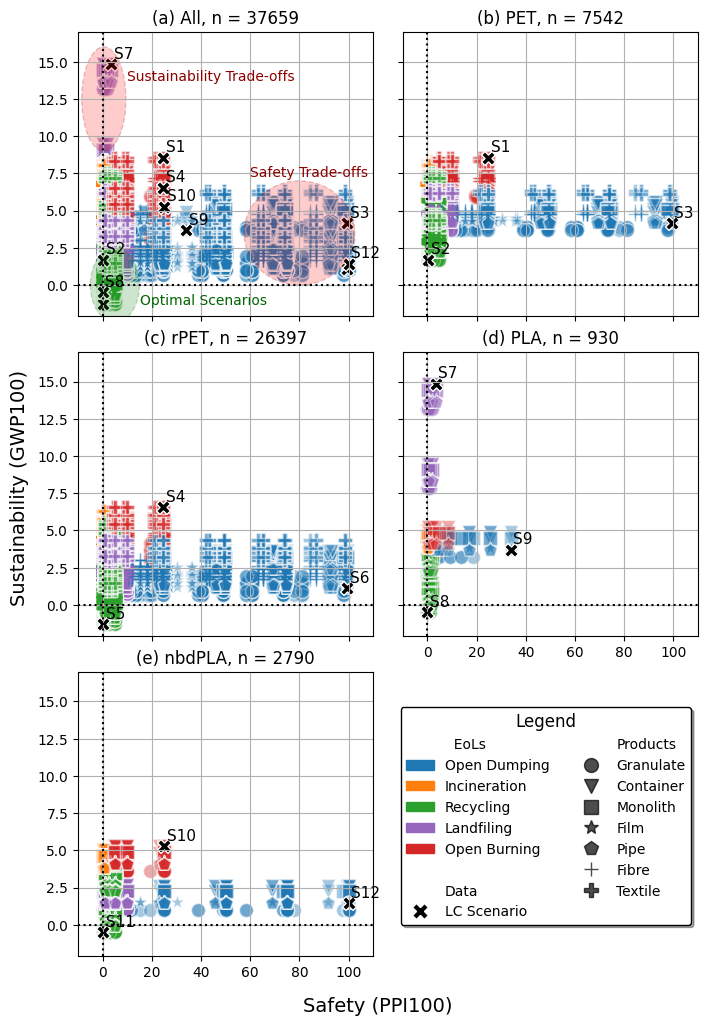

In [48]:
rows = 3 #all, PET, rPET, PLA, nbdPLA
cols = 2 #GWP100, UBP, EcoTox, cHumTox, ncHumTox
fig, axes = plt.subplots(rows, cols, figsize=(4*cols,4*rows), sharex = True, sharey = True)
plt.subplots_adjust(wspace=0.1, hspace=0.125)
#plt.grid()  #just add this
fig.supxlabel('Safety (PPI100)', fontsize=14, x = 0.5, y = 0.06)
fig.supylabel('Sustainability (GWP100)', fontsize=14, x = 0.04, y = 0.5)

product_markers = ['o', 'v', 's', '*', 'p', '+', 'P'] 
products = dict(zip(saf_sus_lcs['Product'].unique(), product_markers))

product_eols_clrs = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:red']
product_eols = dict(zip(saf_sus_lcs['EoL'].unique(), product_eols_clrs))

polymers = {'PET': len(saf_sus_lcs[saf_sus_lcs['Polymer']=='PET']), 
            'rPET': len(saf_sus_lcs[saf_sus_lcs['Polymer']=='rPET']), 
            'PLA': len(saf_sus_lcs[saf_sus_lcs['Polymer']=='PLA']), 
            'nbdPLA': len(saf_sus_lcs[saf_sus_lcs['Polymer']=='nbdPLA'])}
count = 0
ttl = ['a', 'b', 'c', 'd','e']
for i in range(rows):
    for j in range(cols):
        for product in products.keys():
            for product_eol in product_eols.keys():
                if count == 0:
                    filtered_data = saf_sus_lcs[(saf_sus_lcs['Product']==product) & (saf_sus_lcs['EoL']==product_eol)]
                    sns.scatterplot(data=filtered_data, x='PPI100', y='GWP100',ax = axes[i][j],alpha = 0.4, s=100,color = product_eols[product_eol], marker=products[product],linewidth = 1)
                else: 
                    polymer = list(polymers)[count-1]
                    filtered_data = saf_sus_lcs[(saf_sus_lcs['Polymer']==polymer) & (saf_sus_lcs['Product']==product) & (saf_sus_lcs['EoL']==product_eol)]
                    sns.scatterplot(data=filtered_data, x='PPI100', y='GWP100',ax = axes[i][j],alpha = 0.4, s=100,color = product_eols[product_eol], marker=products[product],linewidth = 1)# edgecolor = product_eols[product_eol])
        axes[i][j].grid(True)
        axes[i][j].set_xlabel('')
        axes[i][j].set_ylabel('')
        axes[i][j].axhline(y=0, color='black', linestyle='dotted')
        axes[i][j].axvline(x=0, color='black', linestyle='dotted')
        #labels = []
        #labels.append("{} ({})".format(polymer,polymers[polymer]))
        #labels.append("root(2) = {0:.4g}".format(np.sqrt(2)))
        #axes[i][j].legend(handles, labels, loc='upper center', fontsize='x-large', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
        axes[i][j].set_xlim([-10, 110])
        axes[i][j].set_ylim([-2.1, 17])
        if count == 0:
            axes[i][j].set_title("({}) All, n = {}".format(ttl[count],len(saf_sus_lcs)), loc='center',)
        else:
            axes[i][j].set_title("({}) {}, n = {}".format(ttl[count],polymer,polymers[polymer]), loc='center',)
        count = count + 1
        if count == (rows*cols -1):
            axes[i][j+1].axis('off')
            axes[i-1][j+1].tick_params(axis='x', labelbottom=True, bottom=True)
            break

#here we extract relevant scenarios
sc_polymers = ['PET','rPET','PLA','nbdPLA']
scs = []
for sc_polymer in sc_polymers:
    data = saf_sus_lcs[saf_sus_lcs['Polymer']==sc_polymer]
    Smaxmax = data[(data['GWP100'] == data['GWP100'].max()) & 
              (data['PPI100']== data[data['GWP100'] == data['GWP100'].max()]['PPI100'].max())].reset_index()
    scs.append(Smaxmax.iloc[0])
    Sminmin = data[(data['GWP100'] == data['GWP100'].min()) & 
              (data['PPI100']== data[data['GWP100'] == data['GWP100'].min()]['PPI100'].min())].reset_index()
    scs.append(Sminmin.iloc[0])
    Smaxmin = data[(data['PPI100'] == data['PPI100'].max()) & 
              (data['GWP100']== data[data['PPI100'] == data['PPI100'].max()]['GWP100'].min())].reset_index()
    scs.append(Smaxmin.iloc[0])

specific_scenarios = pd.DataFrame(scs).reset_index().drop(columns=['level_0','index','UBP','EcoTox','cHumTox','ncHumTox'])
specific_scenarios['Scenario'] = 'S' + (specific_scenarios.index + 1).astype(str)
#then we plot sepcfic scenarios for all polymers
sns.scatterplot(data=specific_scenarios, x='PPI100', y='GWP100',ax = axes[0][0],s=100,color = 'black', marker='X',linewidth = 1, )
for i, row in specific_scenarios.iterrows():
    if row['Scenario']!='S6' and row['Scenario']!='S11' and row['Scenario']!='S5':
        axes[0][0].annotate(row['Scenario'], 
                       (row['PPI100'], row['GWP100']), xytext=(2, 2), 
                        textcoords='offset points',
                       fontsize=11, ha='left', va='bottom')

from matplotlib.patches import Ellipse
ellipse1 = Ellipse((0.5, 12.5), width=18, height=7, angle=0, edgecolor='darkred', linestyle ='dashed', facecolor='red', alpha = 0.2)
axes[0][0].add_patch(ellipse1)
axes[0][0].annotate('Sustainability Trade-offs', (10, 13.5), xytext=(0, 0), 
                        textcoords='offset points',
                       fontsize=10, ha='left', va='bottom', color='darkred')

ellipse2 = Ellipse((80, 3.5), width=45, height=7, angle=0, edgecolor='darkred', linestyle ='dashed', facecolor='red', alpha = 0.2)
axes[0][0].add_patch(ellipse2)
axes[0][0].annotate('Safety Trade-offs',(60, 7.1), xytext=(0, 0), 
                        textcoords='offset points',
                       fontsize=10, ha='left', va='bottom',color='darkred')

ellipse3 = Ellipse((5, 0), width=20, height=5, angle=0, edgecolor='darkgreen', linestyle ='dashed', facecolor='green', alpha = 0.2)
axes[0][0].add_patch(ellipse3)
axes[0][0].annotate('Optimal Scenarios',(15, -1.5), xytext=(0, 0), 
                        textcoords='offset points',
                       fontsize=10, ha='left', va='bottom',color='darkgreen')
        
axes[0][0].set_ylabel('')
#then we plot sepcfic scenarios for PET
sns.scatterplot(data=specific_scenarios[specific_scenarios['Polymer']=='PET'], x='PPI100', y='GWP100',ax = axes[0][1],s=100,color = 'black', marker='X',linewidth = 1, )
for i, row in specific_scenarios[specific_scenarios['Polymer']=='PET'].iterrows():
    axes[0][1].annotate(row['Scenario'], 
                       (row['PPI100'], row['GWP100']), xytext=(2, 2), 
                        textcoords='offset points',
                       fontsize=11, ha='left', va='bottom')
#then we plot sepcfic scenarios for rPET
sns.scatterplot(data=specific_scenarios[specific_scenarios['Polymer']=='rPET'], x='PPI100', y='GWP100',ax = axes[1][0],s=100,color = 'black', marker='X',linewidth = 1, )
for i, row in specific_scenarios[specific_scenarios['Polymer']=='rPET'].iterrows():
    axes[1][0].annotate(row['Scenario'], 
                       (row['PPI100'], row['GWP100']), xytext=(2, 2), 
                        textcoords='offset points',
                       fontsize=11, ha='left', va='bottom')
axes[1][0].set_ylabel('')
#then we plot sepcfic scenarios for PLA
sns.scatterplot(data=specific_scenarios[specific_scenarios['Polymer']=='PLA'], x='PPI100', y='GWP100',ax = axes[1][1],s=100,color = 'black', marker='X',linewidth = 1, )
for i, row in specific_scenarios[specific_scenarios['Polymer']=='PLA'].iterrows():
    axes[1][1].annotate(row['Scenario'], 
                       (row['PPI100'], row['GWP100']), xytext=(2, 2), 
                        textcoords='offset points',
                       fontsize=11, ha='left', va='bottom')
axes[1][1].set_xlabel('')

#then we plot sepcfic scenarios for nbdPLA
sns.scatterplot(data=specific_scenarios[specific_scenarios['Polymer']=='nbdPLA'], x='PPI100', y='GWP100',ax = axes[2][0],s=100,color = 'black', marker='X',linewidth = 1, )
for i, row in specific_scenarios[specific_scenarios['Polymer']=='nbdPLA'].iterrows():
    axes[2][0].annotate(row['Scenario'], 
                       (row['PPI100'], row['GWP100']), xytext=(2, 2), 
                        textcoords='offset points',
                       fontsize=11, ha='left', va='bottom')

axes[2][0].set_xlabel('')
axes[2][0].set_ylabel('')
        
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
handles, labels = plt.gca().get_legend_handles_labels()

#define patches and lines to add to legend
subheading1 = plt.Line2D([], [], color='none', label='  EoLs', markersize = 10)
patch1 = mpatches.Patch(color='tab:blue', label='Open Dumping')
patch2 = mpatches.Patch(color='tab:orange', label='Incineration')
patch3 = mpatches.Patch(color='tab:green', label='Recycling')
patch4 = mpatches.Patch(color='tab:purple', label='Landfiling')  
patch5 = mpatches.Patch(color='tab:red', label='Open Burning')
subheadingx = plt.Line2D([], [], color='none', label=' ')
subheadingxx = plt.Line2D([], [], color='none', label='Data')
point8 = Line2D([0], [0], label='LC Scenario', marker='X', markersize=12, markeredgecolor='white', markerfacecolor='k',linestyle='', alpha = 1)
subheading2 = plt.Line2D([], [], color='none', label='Products')
point1 = Line2D([0], [0], label='Granulate', marker='o', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point2 = Line2D([0], [0], label='Container', marker='v', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point3 = Line2D([0], [0], label='Monolith', marker='s', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point4 = Line2D([0], [0], label='Film', marker='*', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point5 = Line2D([0], [0], label='Pipe', marker='p', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point6 = Line2D([0], [0], label='Fibre', marker='+', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point7 = Line2D([0], [0], label='Textile', marker='P', markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)

#add handles
handles.extend([subheading1,patch1, patch2,patch3,patch4,patch5, subheadingx, subheadingxx,point8 ,subheading2, point1, point2, point3, point4, point5, point6, point7])

#add legend
plt.legend(title_fontsize='large',     
           frameon=True,
           edgecolor='black',
           title='Legend', 
           handles=handles, loc='upper right', 
           bbox_to_anchor=(1, 0.9),
           fancybox=True, shadow=True, fontsize='medium',
           ncol=2)

plt.savefig('r1_pol_saf_sus.svg', bbox_inches = 'tight',pad_inches = 0.01)
plt.savefig('r1_pol_saf_sus.jpg', bbox_inches = 'tight',pad_inches = 0.01)                    
        

In [21]:
#sceanrios plotted in the figure above
specific_scenarios

Polymer    Product          EoL            EoL_det EoL_Product  \
0      PET    textile      burning            burning  no product   
1      PET  granulate    recycling          recycling    recycled   
2      PET       pipe      dumping      wet_open_dump  no product   
3     rPET    textile      burning            burning  no product   
4     rPET  granulate    recycling          recycling    recycled   
5     rPET       pipe      dumping      wet_open_dump  no product   
6      PLA  container  landfilling  unsan_landfilling  no product   
7      PLA  granulate    recycling          recycling    recycled   
8      PLA       pipe      dumping      wet_open_dump  no product   
9   nbdPLA  container      burning            burning  no product   
10  nbdPLA  granulate    recycling          recycling    recycled   
11  nbdPLA       pipe      dumping      wet_open_dump  no product   

                    Flow_FF  RF_FF     GWP100     PPI100 Scenario  
0   emission to fresh water   0.25   8.549123  24.654385       S1  
1          emission to soil   0.01   1.694225   0.151933       S2  
2   emission to fresh water   1.00   4.169887  99.305556       S3  
3   emission to fresh water   0.25   6.551302  24.654385       S4  
4          emission to soil   0.01  -1.297104   0.151933       S5  
5   emission to fresh water   1.00   1.105001  99.305556       S6  
6          emission to soil   0.10  14.848291   3.381692       S7  
7          emission to soil   0.01  -0.492333   0.031440       S8  
8          emission to soil   1.00   3.701456  33.816916       S9  
9   emission to fresh water   0.25   5.266182  24.999718      S10  
10         emission to soil   0.01  -0.492333   0.151933      S11  
11  emission to fresh water   1.00   1.429923  99.998874      S12

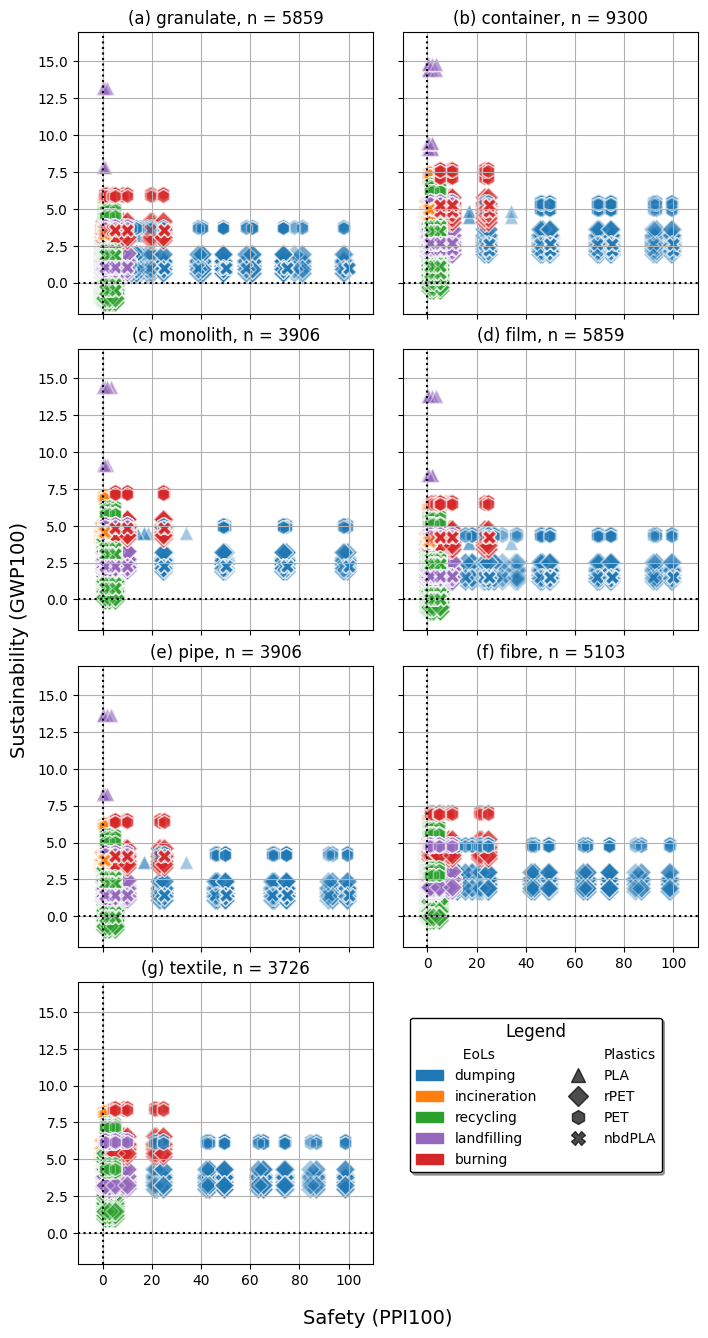

In [22]:
rows = 4 # products
cols = 2 #GWP100, UBP, EcoTox, cHumTox, ncHumTox
fig, axes = plt.subplots(rows, cols, figsize=(4*cols,4*rows), sharex = True, sharey = True)
plt.subplots_adjust(wspace=0.1, hspace=0.125)
#plt.grid()  #just add this
fig.supxlabel('Safety (PPI100)', fontsize=14, x = 0.5, y = 0.07)
fig.supylabel('Sustainability (GWP100)', fontsize=14, x = 0.04, y = 0.5)

products = {product: len(saf_sus_lcs[saf_sus_lcs['Product'] == product]) 
            for product in saf_sus_lcs['Product'].unique()}


product_eols_clrs = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:red']
product_eols = dict(zip(saf_sus_lcs['EoL'].unique(), product_eols_clrs))


polymers_markers = ['^','D','h','X']
polymers = dict(zip(saf_sus_lcs['Polymer'].unique(), polymers_markers))

count = 0
ttl = ['a', 'b', 'c', 'd','e','f','g']
for i in range(rows):
    for j in range(cols):
        for polymer in polymers.keys():
            for product_eol in product_eols.keys():
                
                    
                product = list(products)[count]
                filtered_data = saf_sus_lcs[(saf_sus_lcs['Polymer']==polymer) & (saf_sus_lcs['Product']==product) & (saf_sus_lcs['EoL']==product_eol)]
                sns.scatterplot(data=filtered_data, x='PPI100', y='GWP100',ax = axes[i][j],alpha = 0.4, s=100,color = product_eols[product_eol], marker=polymers[polymer],linewidth = 1)# edgecolor = product_eols[product_eol])
                
        #sns.kdeplot(data=saf_sus_lcs[(saf_sus_lcs['Product']==product)], x='PPI100', y='GWP100', color="gray", fill=True, alpha = 0.5, ax = axes[i][j], cut = 0)
        axes[i][j].grid(True)
        axes[i][j].set_xlabel('')
        axes[i][j].set_ylabel('')
        axes[i][j].axhline(y=0, color='black', linestyle='dotted')
        axes[i][j].axvline(x=0, color='black', linestyle='dotted')
        #labels = []
        #labels.append("{} ({})".format(polymer,polymers[polymer]))
        #labels.append("root(2) = {0:.4g}".format(np.sqrt(2)))
        #axes[i][j].legend(handles, labels, loc='upper center', fontsize='x-large', fancybox=True, framealpha=0.7, handlelength=0, handletextpad=0)
        axes[i][j].set_xlim([-10, 110])
        axes[i][j].set_ylim([-2.1, 17])
        axes[i][j].set_title("({}) {}, n = {}".format(ttl[count],product,products[product]), loc='center',)
        count = count + 1
        if count == (rows*cols -1):
            axes[i][j+1].axis('off')
            axes[i-1][j+1].tick_params(axis='x', labelbottom=True, bottom=True)
            break
        
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
handles, labels = plt.gca().get_legend_handles_labels()

#define patches and lines to add to legend
subheading1 = plt.Line2D([], [], color='none', label='  EoLs', markersize = 10)
patch1 = mpatches.Patch(color=product_eols[list(product_eols)[0]], label=list(product_eols)[0])
patch2 = mpatches.Patch(color=product_eols[list(product_eols)[1]], label=list(product_eols)[1])
patch3 = mpatches.Patch(color=product_eols[list(product_eols)[2]], label=list(product_eols)[2])
patch4 = mpatches.Patch(color=product_eols[list(product_eols)[3]], label=list(product_eols)[3])
patch5 = mpatches.Patch(color=product_eols[list(product_eols)[4]], label=list(product_eols)[4])
subheadingx = plt.Line2D([], [], color='none', label=' ')
subheadingxx = plt.Line2D([], [], color='none', label=' ')
subheading2 = plt.Line2D([], [], color='none', label='Plastics')
point1 = Line2D([0], [0], marker=polymers[list(polymers)[0]], label=list(polymers)[0], markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point2 = Line2D([0], [0], marker=polymers[list(polymers)[1]], label=list(polymers)[1], markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point3 = Line2D([0], [0], marker=polymers[list(polymers)[2]], label=list(polymers)[2], markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
point4 = Line2D([0], [0], marker=polymers[list(polymers)[3]], label=list(polymers)[3], markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)
#point5 = Line2D([0], [0], label=list(product_eols)[4], marker=product_eols[list(product_eols)[4]], markersize=10, markeredgecolor='black', markerfacecolor='k', linestyle='', linewidth = 3, alpha = 0.7)

#add handles
handles.extend([subheading1,patch1, patch2,patch3,patch4,patch5, subheading2, point1, point2, point3, point4, subheadingx])

#add legend
plt.legend(title_fontsize='large',     
           frameon=True,
           edgecolor='black',
           title='Legend', 
           handles=handles, loc='upper right', 
           bbox_to_anchor=(0.9, 0.9),
           fancybox=True, shadow=True, fontsize='medium',
           ncol=2)

plt.savefig('r2_prod_saf_sus.svg', bbox_inches = 'tight',pad_inches = 0.01)
plt.savefig('r2_prod_saf_sus.jpg', bbox_inches = 'tight',pad_inches = 0.01)                    
        

In [23]:
sc_polymers = ['PET','rPET','PLA','nbdPLA']
scs = []
for sc_polymer in sc_polymers:
    data = saf_sus_lcs[saf_sus_lcs['Polymer']==sc_polymer]
    Smaxmax = data[(data['GWP100'] == data['GWP100'].max()) & 
              (data['PPI100']== data[data['GWP100'] == data['GWP100'].max()]['PPI100'].max())].reset_index()
    scs.append(Smaxmax.iloc[0])
    Sminmin = data[(data['GWP100'] == data['GWP100'].min()) & 
              (data['PPI100']== data[data['GWP100'] == data['GWP100'].min()]['PPI100'].min())].reset_index()
    scs.append(Sminmin.iloc[0])
    Smaxmin = data[(data['PPI100'] == data['PPI100'].max()) & 
              (data['GWP100']== data[data['PPI100'] == data['PPI100'].max()]['GWP100'].min())].reset_index()
    scs.append(Smaxmin.iloc[0])

specific_scenarios = pd.DataFrame(scs).reset_index().drop(columns=['level_0','index','UBP','EcoTox','cHumTox','ncHumTox'])
specific_scenarios['Scenario'] = 'S' + (specific_scenarios.index + 1).astype(str)
specific_scenarios

Polymer    Product          EoL            EoL_det EoL_Product  \
0      PET    textile      burning            burning  no product   
1      PET  granulate    recycling          recycling    recycled   
2      PET       pipe      dumping      wet_open_dump  no product   
3     rPET    textile      burning            burning  no product   
4     rPET  granulate    recycling          recycling    recycled   
5     rPET       pipe      dumping      wet_open_dump  no product   
6      PLA  container  landfilling  unsan_landfilling  no product   
7      PLA  granulate    recycling          recycling    recycled   
8      PLA       pipe      dumping      wet_open_dump  no product   
9   nbdPLA  container      burning            burning  no product   
10  nbdPLA  granulate    recycling          recycling    recycled   
11  nbdPLA       pipe      dumping      wet_open_dump  no product   

                    Flow_FF  RF_FF     GWP100     PPI100 Scenario  
0   emission to fresh water   0.25   8.549123  24.654385       S1  
1          emission to soil   0.01   1.694225   0.151933       S2  
2   emission to fresh water   1.00   4.169887  99.305556       S3  
3   emission to fresh water   0.25   6.551302  24.654385       S4  
4          emission to soil   0.01  -1.297104   0.151933       S5  
5   emission to fresh water   1.00   1.105001  99.305556       S6  
6          emission to soil   0.10  14.848291   3.381692       S7  
7          emission to soil   0.01  -0.492333   0.031440       S8  
8          emission to soil   1.00   3.701456  33.816916       S9  
9   emission to fresh water   0.25   5.266182  24.999718      S10  
10         emission to soil   0.01  -0.492333   0.151933      S11  
11  emission to fresh water   1.00   1.429923  99.998874      S12

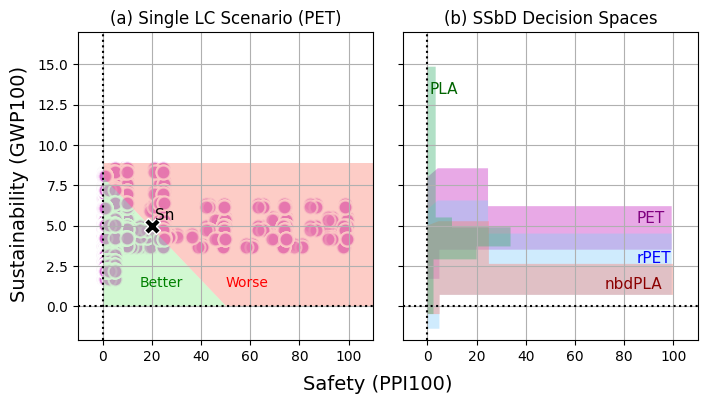

In [24]:
#here we plot the decision spaces for varios polymers
from matplotlib.patches import Polygon

rows = 1 # products
cols = 2 #GWP100, UBP, EcoTox, cHumTox, ncHumTox
fig, axes = plt.subplots(rows, cols, figsize=(4*cols,4*rows), sharex = True, sharey = True)
plt.subplots_adjust(wspace=0.1, hspace=0.125)
#plt.grid()  #just add this
fig.supxlabel('Safety (PPI100)', fontsize=14, x = 0.5, y = -0.025)
fig.supylabel('Sustainability (GWP100)', fontsize=14, x = 0.04, y = 0.5)

# Add the polygon to the plot


sns.scatterplot(data=saf_sus_lcs[saf_sus_lcs['Polymer']=='PET'], x='PPI100', y='GWP100',ax = axes[0], alpha = 0.7, s=100,color = 'orchid', marker='o',linewidth = 1.5)
axes[0].plot(20, 5, marker='X', color='black', markersize=12, linewidth = 1 ,markeredgecolor='white')
axes[0].annotate('Sn', (20, 5), xytext=(2, 2), 
                 textcoords='offset points',
                 fontsize=11, ha='left', va='bottom')
# Define the vertices of the polygon
vertices_better = [(0, 8), (0, 0), (50, 0)]
vertices_worse = [(0, 8), (0, 8.9), (110, 8.9),(110, 0),(50, 0)]
# Create a Polygon object
better = Polygon(vertices_better, closed=True, facecolor='lightgreen', edgecolor='black', linewidth=0, alpha = 0.4)
worse = Polygon(vertices_worse, closed=True, facecolor='salmon', edgecolor='black', linewidth=0, alpha = 0.4)
axes[0].add_patch(better)
axes[0].add_patch(worse)
axes[0].annotate('Better', (15, 1), xytext=(0, 0), 
                 textcoords='offset points',
                 fontsize=10, ha='left', va='bottom',color='green')
axes[0].annotate('Worse', (50, 1), xytext=(0, 0), 
                 textcoords='offset points',
                 fontsize=10, ha='left', va='bottom',color='red')
axes[0].set_title("(a) Single LC Scenario (PET)", loc='center',)

#first the edges of the polymers graphs were determined using the code in the next cell; the edges 'vs' had to be odified a little for better fitting 
#sns.scatterplot(data=saf_sus_lcs[saf_sus_lcs['Polymer']=='nbdPLA'], x='PPI100', y='GWP100',ax = axes[1], alpha = 0.7, s=100,color = 'gray', marker='o',linewidth = 1.5)
axes[1].set_title("(b) SSbD Decision Spaces", loc='center',)
vs_PET =[(0.1519331292050082, 1.6942247089214142),
         (0.0151933129205008, 8),
         (4.21670524691358, 8.549123217791918),
         (24.65438528806593, 8.549123217791918),
         (24.65438528806593, 6.2),
         (99.30555555555571, 6.2),
         (99.30555555555571, 3.5),
         (4.896794490526423, 3.5),
         (4.896794490526423, 1.6942247089214142)]
vs_rPET =[(0.1519331292050082, -1.4),
          (0.0151933129205008, 6),
          (4.21670524691358, 6.551301743706437),
          (24.65438528806593, 6.551301743706437),
          (24.65438528806593, 4.5),
          (99.30555555555571, 4.5),
          (99.30555555555571, 0.7),
          (4.896794490526423, 0.7),
          (4.896794490526423, -1.4)]
vs_PLA = [(0.031439633901215, -0.4923327889702862),
          (0.0031439633901215, 3.355209846903945),
          (0.0608135707205235, 14.848291221042484),
          (3.381691578909336, 14.848291221042484),
          (3.381691578909336, 5.5),
          (10, 5.5),
          (10, 4.888053786718608),
          (33.81691578909336, 4.888053786718608),
          (33.81691578909336, 3.7014556749336713),
          (20, 3.7014556749336713),
          (20, 2.9),
          (2.5, 2.9),
          (2.5, -0.4923327889702862)]
vs_nbdPLA = [(0.1519331292050082, -0.4923327889702862),
              (0.0151933129205008, 5),
              (4.585416666666666, 5.266181939612688),
              (24.99971842859663, 5.266181939612688),
              (24.99971842859663, 2.6211665873635943),
              (99.99887371438652, 2.6211665873635943),
              (99.99887371438652, 0.7),
              (4.999831059684813, 0.7),
              (4.999831059684813, -0.4923327889702862)]

ds_PET = Polygon(vs_PET, closed=True, facecolor='orchid', edgecolor='black', linewidth=0, alpha = 0.6)
ds_rPET = Polygon(vs_rPET, closed=True, facecolor='lightskyblue', edgecolor='black', linewidth=0, alpha = 0.4)
ds_PLA = Polygon(vs_PLA, closed=True, facecolor='mediumseagreen', edgecolor='black', linewidth=0, alpha = 0.4)
ds_nbdPLA = Polygon(vs_nbdPLA, closed=True, facecolor='salmon', edgecolor='black', linewidth=0, alpha = 0.4)
axes[1].add_patch(ds_PET)
axes[1].annotate('PET', (85, 5), xytext=(0, 0), 
                 textcoords='offset points',
                 fontsize=11, ha='left', va='bottom',color='purple')
axes[1].add_patch(ds_rPET)
axes[1].annotate('rPET', (85, 2.5), xytext=(0, 0), 
                 textcoords='offset points',
                 fontsize=11, ha='left', va='bottom',color='blue')

axes[1].add_patch(ds_nbdPLA)
axes[1].annotate('nbdPLA', (72, 0.9), xytext=(0, 0), 
                 textcoords='offset points',
                 fontsize=11, ha='left', va='bottom',color='darkred')
axes[1].add_patch(ds_PLA)
axes[1].annotate('PLA', (1, 13), xytext=(0, 0), 
                 textcoords='offset points',
                 fontsize=11, ha='left', va='bottom',color='darkgreen')


for i in range(cols):
    axes[i].grid(True)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].axhline(y=0, color='black', linestyle='dotted')
    axes[i].axvline(x=0, color='black', linestyle='dotted')
    axes[i].set_xlim([-10, 110])
    axes[i].set_ylim([-2.1, 17])

plt.savefig('r3_decision_space.svg', bbox_inches = 'tight',pad_inches = 0.01)
plt.savefig('r3_decision_space.jpg', bbox_inches = 'tight',pad_inches = 0.01)                


In [25]:
#this coide was used to propare the edges for the decision space, however, the fititng was not perfect and thereofre adaptations had to be made to the vertex values
sc_polymers = ['PET','rPET','PLA','nbdPLA']
shapes = []

for sc_polymer in sc_polymers:
    data = saf_sus_lcs[saf_sus_lcs['Polymer']== sc_polymer]

    Sminmin = data[(data['GWP100'] == data['GWP100'].min()) & 
              (data['PPI100']== data[data['GWP100'] == data['GWP100'].min()]['PPI100'].min())].reset_index().iloc[0]
    
    Sf1 = data[(data['PPI100'] == data['PPI100'].min()) & 
              (data['GWP100']== data[data['PPI100'] == data['PPI100'].min()]['GWP100'].max())].reset_index().iloc[0]

    Sminmax1 = data[(data['GWP100'] == data['GWP100'].max()) & 
              (data['PPI100']== data[data['GWP100'] == data['GWP100'].max()]['PPI100'].min())].reset_index().iloc[0]

    Smaxmax1 = data[(data['GWP100'] == data['GWP100'].max()) & 
              (data['PPI100']== data[data['GWP100'] == data['GWP100'].max()]['PPI100'].max())].reset_index().iloc[0]

#xx

    Smax1max = data[(data['PPI100'] == data['PPI100'].max()) & 
              (data['GWP100']== data[data['PPI100'] == data['PPI100'].max()]['GWP100'].max())].reset_index().iloc[0]


    Smax1min = data[(data['PPI100'] == data['PPI100'].max()) & 
              (data['GWP100']== data[data['PPI100'] == data['PPI100'].max()]['GWP100'].min())].reset_index().iloc[0]
#xx

    Smaxmin1 = data[(data['GWP100'] == data['GWP100'].min()) & 
              (data['PPI100']== data[data['GWP100'] == data['GWP100'].min()]['PPI100'].max())].reset_index().iloc[0]


    vertices = [(Sminmin['PPI100'],Sminmin['GWP100']), 
                (Sf1['PPI100'],Sf1['GWP100']),
                (Sminmax1['PPI100'],Sminmax1['GWP100']),
                (Smaxmax1['PPI100'],Smaxmax1['GWP100']),
                (Smaxmax1['PPI100'],Smax1max['GWP100']),
                (Smax1max['PPI100'],Smax1max['GWP100']), 
                (Smax1min['PPI100'],Smax1min['GWP100']),
                (Smaxmin1['PPI100'],Smax1min['GWP100']),
                (Smaxmin1['PPI100'],Smaxmin1['GWP100'])]
    shapes.append(vertices)
shapes

[[(0.1519331292050082, 1.6942247089214142),
  (0.0151933129205008, 5.8383774803510295),
  (4.21670524691358, 8.549123217791918),
  (24.65438528806593, 8.549123217791918),
  (24.65438528806593, 5.552876387078663),
  (99.30555555555571, 5.552876387078663),
  (99.30555555555571, 4.169887226456818),
  (4.896794490526423, 4.169887226456818),
  (4.896794490526423, 1.6942247089214142)],
 [(0.1519331292050082, -1.2971042936203296),
  (0.0151933129205008, 3.9374303695439536),
  (4.21670524691358, 6.551301743706437),
  (24.65438528806593, 6.551301743706437),
  (24.65438528806593, 3.609167684821939),
  (99.30555555555571, 3.609167684821939),
  (99.30555555555571, 1.105000953360769),
  (4.896794490526423, 1.105000953360769),
  (4.896794490526423, -1.2971042936203296)],
 [(0.031439633901215, -0.4923327889702862),
  (0.0031439633901215, 3.355209846903945),
  (0.0608135707205235, 14.848291221042484),
  (3.381691578909336, 14.848291221042484),
  (3.381691578909336, 4.888053786718608),
  (33.8169157890